In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
import anndata
import pcreode
import matplotlib.pylab as plt
from sklearn.cluster import KMeans

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.19.2 scipy==1.5.2 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1


In [57]:
import os

datadir = './scRNAseq_LI_data'

adata1 = sc.read_10x_mtx(os.path.join(datadir, '201014_UC_LI'))
adata2 = sc.read_10x_mtx(os.path.join(datadir, '201207_UC_LI'))

print(adata1)
adata1.obs

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


AnnData object with n_obs × n_vars = 9161 × 36601
    var: 'gene_ids'


Empty DataFrame
Columns: []
Index: [AAACCCAAGCAGTCTT-1, AAACCCAAGGACGCTA-1, AAACCCAAGGTTGGAC-1, AAACCCAAGTGTACCT-1, AAACCCACAGCTGCCA-1, AAACCCACATCGTCCT-1, AAACCCACATGGGCAA-1, AAACCCACATTGGATC-1, AAACCCAGTCGCAACC-1, AAACCCAGTCTTGCGG-1, AAACCCAGTGTGATGG-1, AAACCCAGTTTCCAAG-1, AAACCCATCTGATGGT-1, AAACGAAAGCTTGTTG-1, AAACGAAAGTCTTCCC-1, AAACGAAAGTGGCAGT-1, AAACGAACAACCTAAC-1, AAACGAACAAGCAGGT-1, AAACGAACAGCAGTGA-1, AAACGAACATCCAATG-1, AAACGAACATCGCCTT-1, AAACGAAGTGAATTAG-1, AAACGAAGTTAGAAAC-1, AAACGAATCAGATGCT-1, AAACGAATCAGTGGGA-1, AAACGAATCCGGCAGT-1, AAACGAATCGGAAGGT-1, AAACGAATCGTAGGAG-1, AAACGCTAGGCACTAG-1, AAACGCTAGTTCTACG-1, AAACGCTCAAATTGGA-1, AAACGCTCAACGGCTC-1, AAACGCTCATGGGTCC-1, AAACGCTCATTCTCCG-1, AAACGCTGTACCTAAC-1, AAACGCTGTCGGAACA-1, AAACGCTGTGAGAGGG-1, AAACGCTGTGGCTCTG-1, AAACGCTGTTGCAAGG-1, AAACGCTGTTGGGTAG-1, AAACGCTTCGGAGTGA-1, AAACGCTTCGGTTGTA-1, AAAGAACAGGAGGCAG-1, AAAGAACAGTAGTCAA-1, AAAGAACCAATTCTCT-1, AAAGAACCACCAGCGT-1, AAAGAACCATGTGCCG-1, AAAGGATAGCCAACCC-1, AAAGGATAGGTCATCT-1, AAAGGATCAGAGGCAT-1, AAAGGATCAGTAGTTC-1, AAAGGATGTCAATCTG-1, AAAGGATGTCACGTGC-1, AAAGGATGTGATACAA-1, AAAGGATGTGGTCTTA-1, AAAGGATTCGAAGAAT-1, AAAGGATTCTATTGTC-1, AAAGGGCAGAGAGCGG-1, AAAGGGCAGCGAGAAA-1, AAAGGGCCACCGGAAA-1, AAAGGGCCACTGAATC-1, AAAGGGCGTAGAGACC-1, AAAGGGCTCCCTTCCC-1, AAAGGGCTCTCGTGGG-1, AAAGGGCTCTGGGCAC-1, AAAGGGCTCTTACACT-1, AAAGGTAAGACCTTTG-1, AAAGGTAAGGTGCTAG-1, AAAGGTACAATGAGCG-1, AAAGGTACACTCGATA-1, AAAGGTACAGAGTCTT-1, AAAGGTAGTAACTAAG-1, AAAGGTAGTTCTTAGG-1, AAAGGTAGTTTCCCAC-1, AAAGGTATCACAATGC-1, AAAGGTATCCGTATAG-1, AAAGGTATCGCTTGAA-1, AAAGTCCAGAGTGTTA-1, AAAGTCCAGCCTTTCC-1, AAAGTCCCAAGCCTGC-1, AAAGTCCCAGGCATTT-1, AAAGTCCCAGGCGTTC-1, AAAGTCCCATAGGCGA-1, AAAGTCCCATTGCTGA-1, AAAGTCCTCATCCTAT-1, AAAGTGAAGCCTCCAG-1, AAAGTGAAGTCTGTAC-1, AAAGTGACAATTCTTC-1, AAAGTGAGTATGGAAT-1, AAAGTGAGTCTGTCCT-1, AAAGTGAGTGACCGAA-1, AAAGTGAGTGCGAGTA-1, AAAGTGAGTTAATCGC-1, AAAGTGATCGCAGAGA-1, AAATGGAAGCAGGCAT-1, AAATGGAAGCCTGACC-1, AAATGGAAGCGATGGT-1, AAATGGAAGTTCTACG-1, AAATGGACAAGGGCAT-1, AAATGGATCCCTAGGG-1, ...]

[9161 rows x 0 columns]

In [58]:
sample_labels = ['201014_UC_LI', '201207_UC_LI']
adata = adata1.concatenate([adata2], batch_categories = sample_labels) 
results_file = 'UC2samples_1.h5ad' 
adata.write(results_file)

In [59]:
adata.obs['counts'] = adata.X.sum(axis=1).A1
adata.obs['n_genes'] = (adata.X > 0.0).astype(int).sum(axis=1).A1
mito_genes = adata.var_names.str.startswith('MT-')
adata.obs['percent_mito']=np.sum(adata[:, mito_genes].X, axis=1).A1\
    / np.sum(adata.X, axis=1).A1

In [60]:
sc.pp.filter_genes(adata, min_cells=3)

filtered out 13285 genes that are detected in less than 3 cells


In [61]:
min_counts = 1000
max_counts = 40000
min_genes = 500
max_genes = 6000
mito_threshold = 0.4

adata = adata[(adata.obs.counts > min_counts) & (adata.obs.counts < max_counts), :]
adata = adata[(adata.obs.n_genes > min_genes) & (adata.obs.n_genes < max_genes), :]
adata = adata[adata.obs.percent_mito < mito_threshold, :]

In [62]:
sc.pp.normalize_total(adata, target_sum = 1e4)
adata = sc.pp.log1p(adata, copy = True)

/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)


In [63]:
results_file = 'UC2samples_2.h5ad' 
adata.write(results_file)
print(adata)

AnnData object with n_obs × n_vars = 11546 × 23316
    obs: 'batch', 'counts', 'n_genes', 'percent_mito'
    var: 'gene_ids', 'n_cells'
    uns: 'log1p'


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


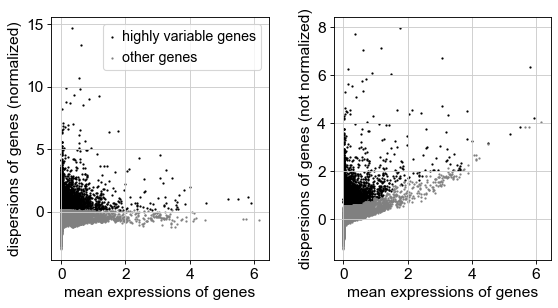

In [64]:
sc.pp.highly_variable_genes(adata, n_top_genes = 10000)
sc.pl.highly_variable_genes(adata)

In [65]:
adata.var.index[np.where(adata.var['highly_variable'])[0]]

Index(['AL627309.1', 'AL627309.5', 'LINC01409', 'LINC01128', 'LINC00115',
       'SAMD11', 'KLHL17', 'PLEKHN1', 'PERM1', 'AL645608.7',
       ...
       'MT-ND3', 'MT-ND4', 'MT-ND6', 'MT-CYB', 'MAFIP', 'AL354822.1',
       'AC004556.3', 'AC136616.1', 'AC007325.4', 'AC007325.2'],
      dtype='object', length=10000)

computing PCA
    on highly variable genes
    with n_comps=20
    finished (0:00:01)


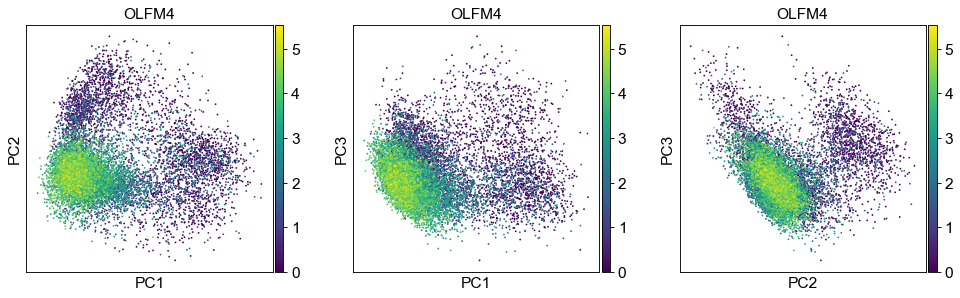

In [66]:
sc.pp.pca(adata, n_comps = 20,use_highly_variable=True)
sc.pl.pca(adata,components=['1,2','1,3','2,3'],color='OLFM4') 

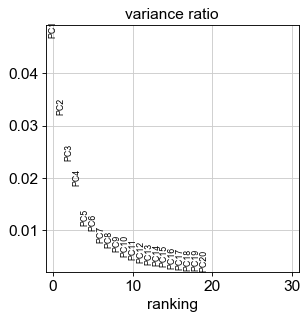

In [67]:
sc.pl.pca_variance_ratio(adata) 

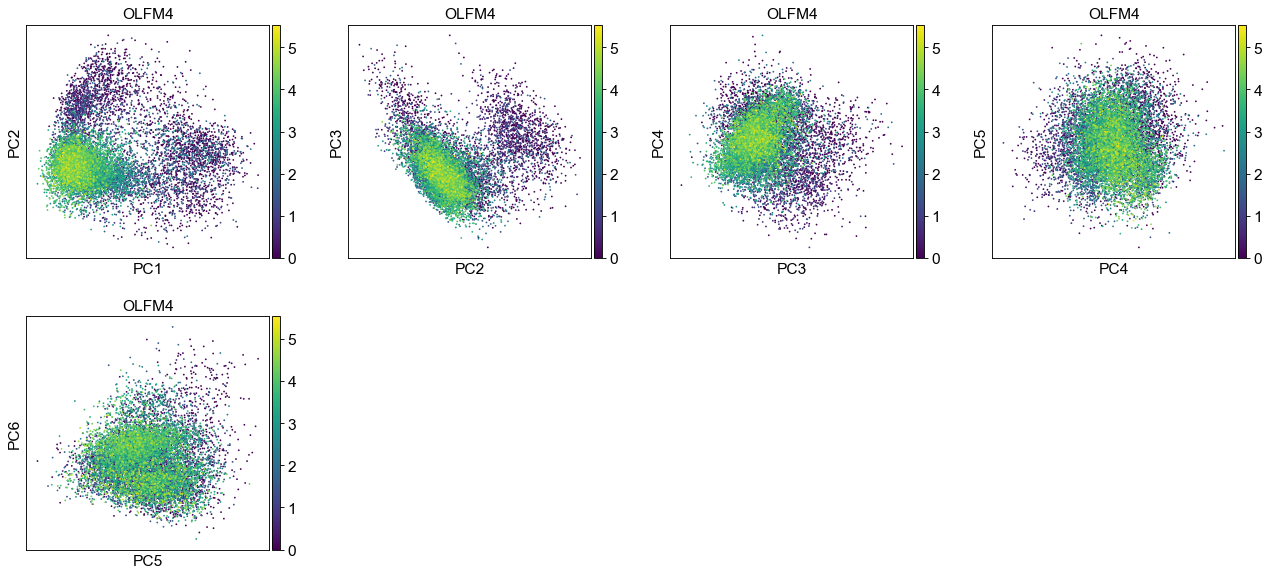

In [68]:
sc.pl.pca(adata,components=['1,2','2,3','3,4','4,5','5,6'],color='OLFM4') 

In [69]:
pca_reduced_data = adata.obsm['X_pca'][:,:3] 

In [70]:
pca_reduced_data.shape

(11546, 3)

best guess starting radius = 2.5347676277160645


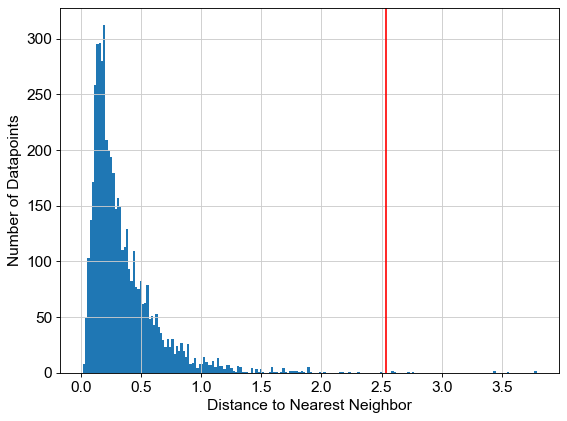

In [71]:
dens = pcreode.Density( pca_reduced_data )
best_guess = dens.nearest_neighbor_hist()

calculating densities for datapoints: 0 -> 4999
calculating densities for datapoints: 5000 -> 9999
calculating densities for datapoints: 10000 -> 11545
****Always check density overlay for radius fit****


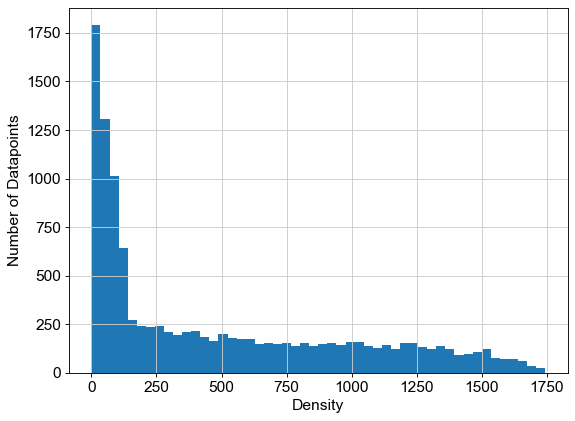

In [72]:
adata.obs['Density'] = dens.get_density( radius=2)
dens.density_hist( n_bins=50)

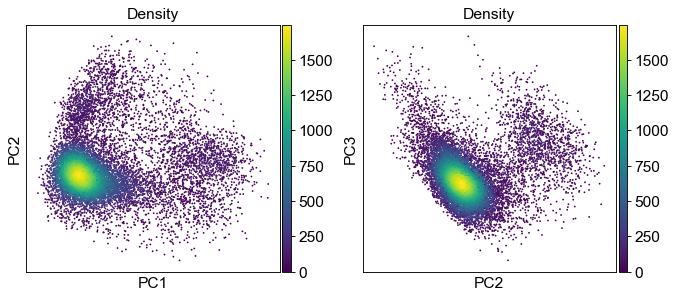

In [73]:
sc.pl.pca(adata,components=['1,2','2,3'],color = 'Density') 

In [74]:
noise = 8
target = 20

In [75]:
downed, downed_ind = pcreode.Down_Sample( pca_reduced_data, adata.obs['Density'], noise, target)

Number of data points in downsample = 3494


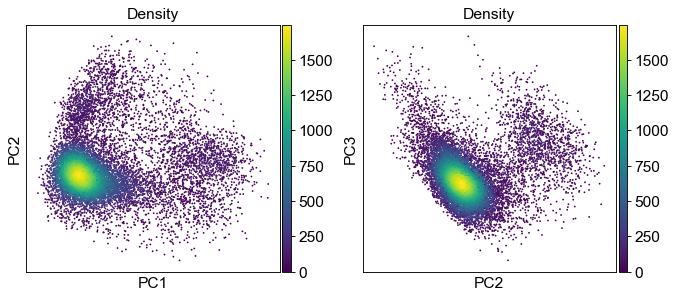

In [76]:
sc.pl.pca(adata,components=['1,2','2,3'],color = 'Density')

In [77]:
print(adata)

AnnData object with n_obs × n_vars = 11546 × 23316
    obs: 'batch', 'counts', 'n_genes', 'percent_mito', 'Density'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'


In [78]:
file_path = "Output_UC2samples/" 

In [79]:
out_graph, out_ids = pcreode.pCreode( data=pca_reduced_data, density=np.array(adata.obs['Density']), noise=noise, 
                                      target=target, file_path=file_path, num_runs=10)

Performing 10 independent runs, may take some time
Number of data points in downsample = 3493
Constructing density kNN
finding endstates
Number of endstates found -> 8
hierarchical placing
consensus aligning
saving files for run_num 1
Number of data points in downsample = 3495
Constructing density kNN
finding endstates
Number of endstates found -> 6
hierarchical placing
consensus aligning
saving files for run_num 2
Number of data points in downsample = 3475
Constructing density kNN
finding endstates
Number of endstates found -> 6
hierarchical placing
consensus aligning
saving files for run_num 3
Number of data points in downsample = 3479
Constructing density kNN
finding endstates
Number of endstates found -> 8
hierarchical placing
consensus aligning
saving files for run_num 4
Number of data points in downsample = 3456
Constructing density kNN
finding endstates
Number of endstates found -> 8
hierarchical placing
consensus aligning
saving files for run_num 5
Number of data points in down

In [80]:
graph_ranks = pcreode.pCreode_Scoring( data=pca_reduced_data, file_path=file_path, num_graphs=10)

scoring graph 1
scoring graph 2
scoring graph 3
scoring graph 4
scoring graph 5
scoring graph 6
scoring graph 7
scoring graph 8
scoring graph 9
Most representative graph IDs from first to worst [6 7 1 8 5 2 4 9 3 0]


In [81]:
gid = graph_ranks[0]
print(gid)

6


In [82]:
analysis = pcreode.Analysis( file_path=file_path, graph_id=gid, data=pca_reduced_data, density=np.array(adata.obs['Density']), noise=noise)

In [83]:
seed=5656565656565656565656

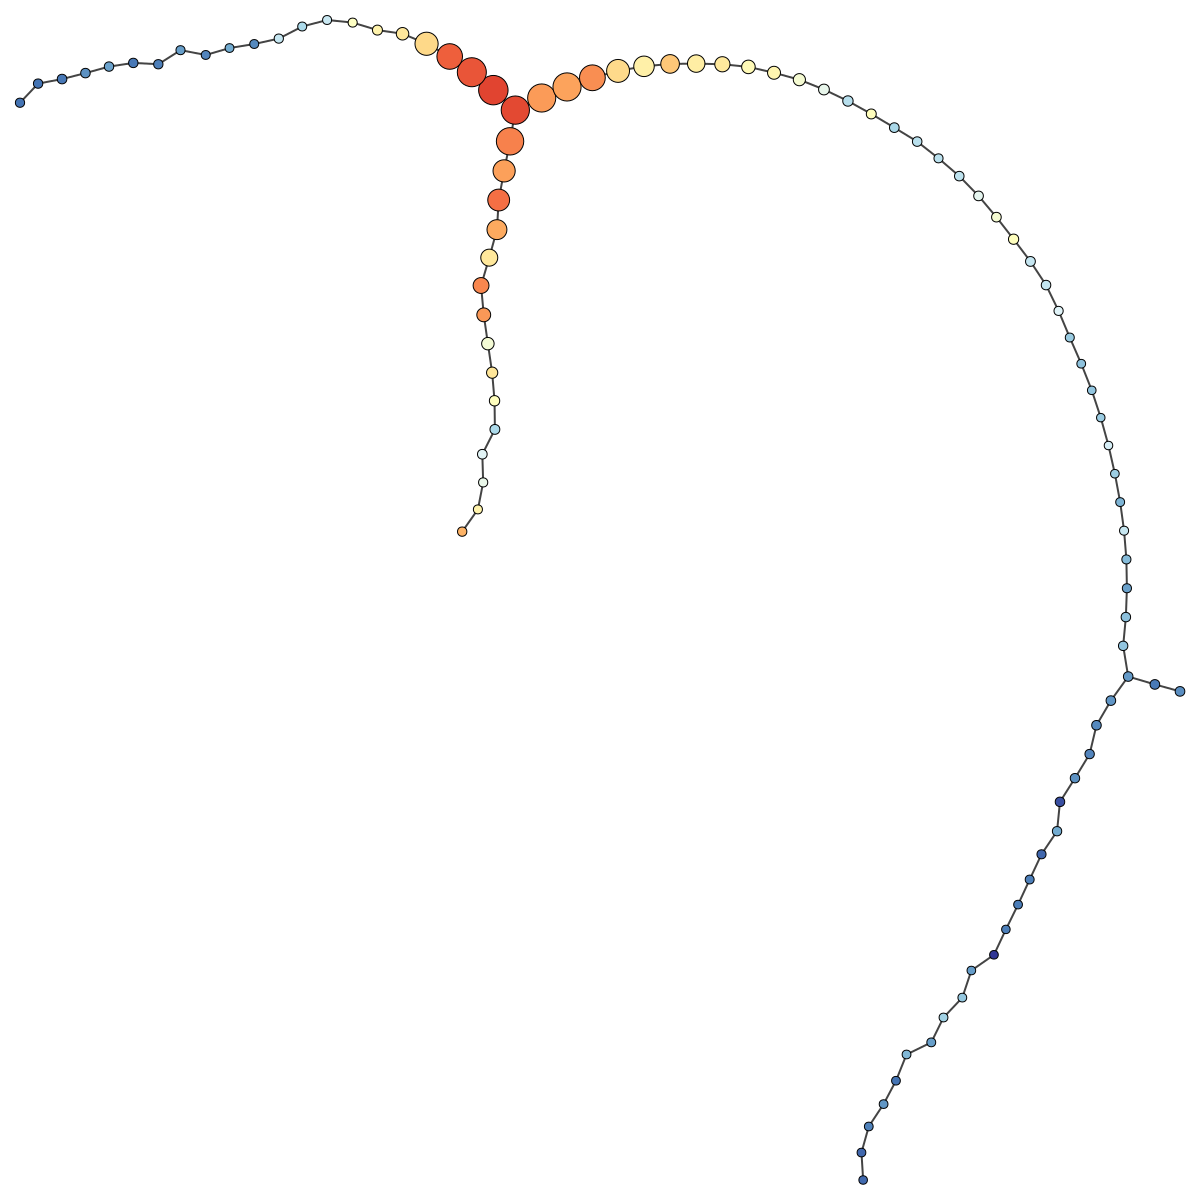

In [85]:
analysis.plot_save_graph( seed=seed, overlay=pd.Series(adata.obs_vector('OLFM4')), file_out='OLFM4', upper_range=1.25)

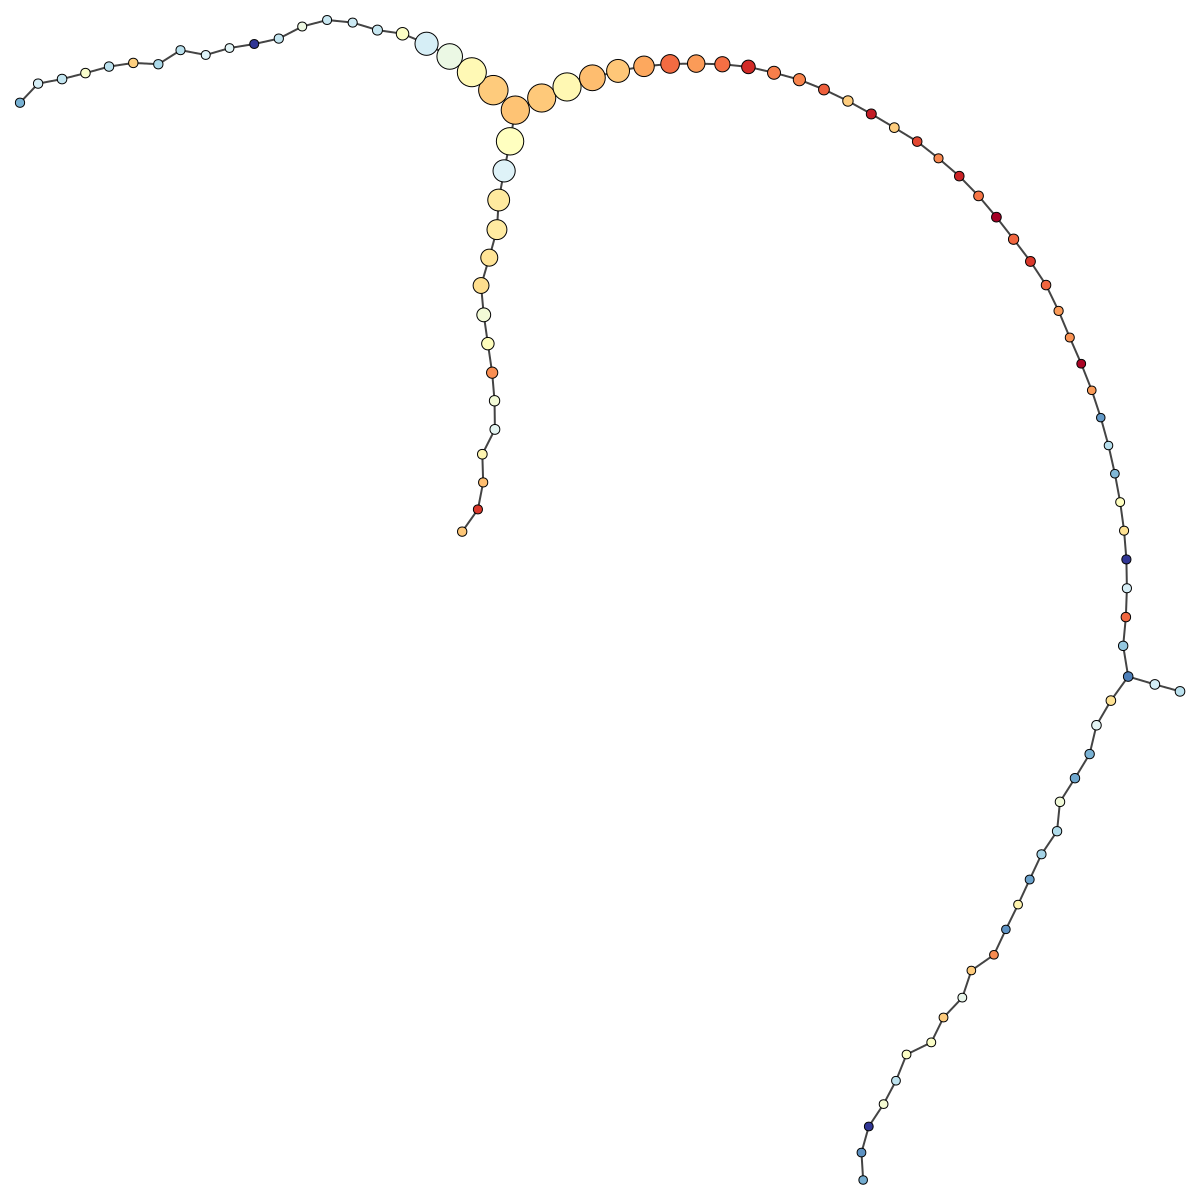

In [86]:
analysis.plot_save_graph( seed=seed, overlay=pd.Series(adata.obs_vector('PITX1')), file_out='PITX1', upper_range=5)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


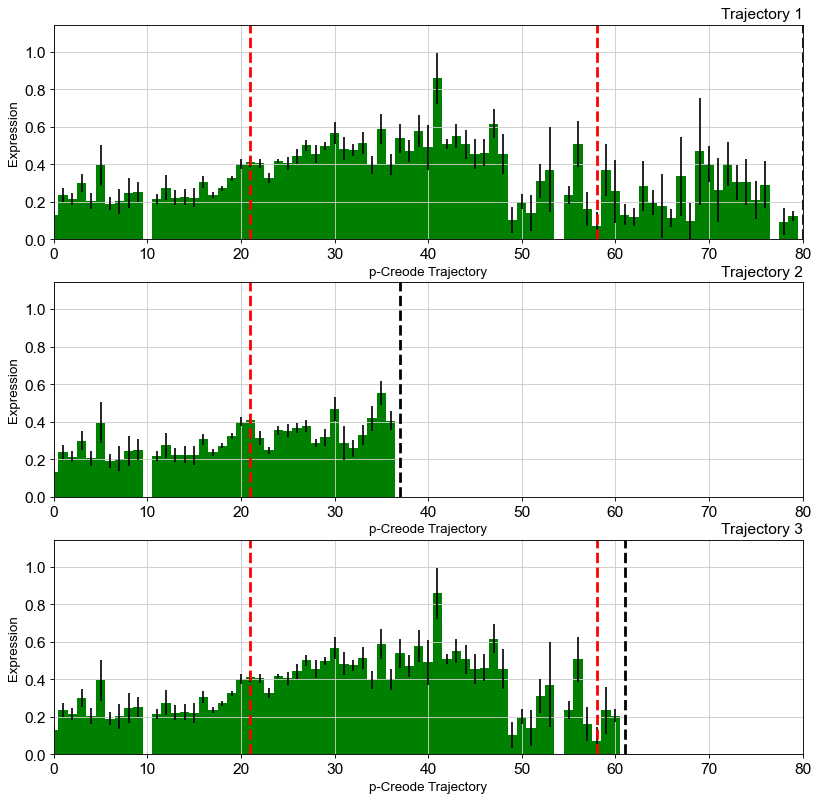

In [147]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('PITX1')), 0)
plt.savefig('Output_UC2samples/PITX1_graph.png')

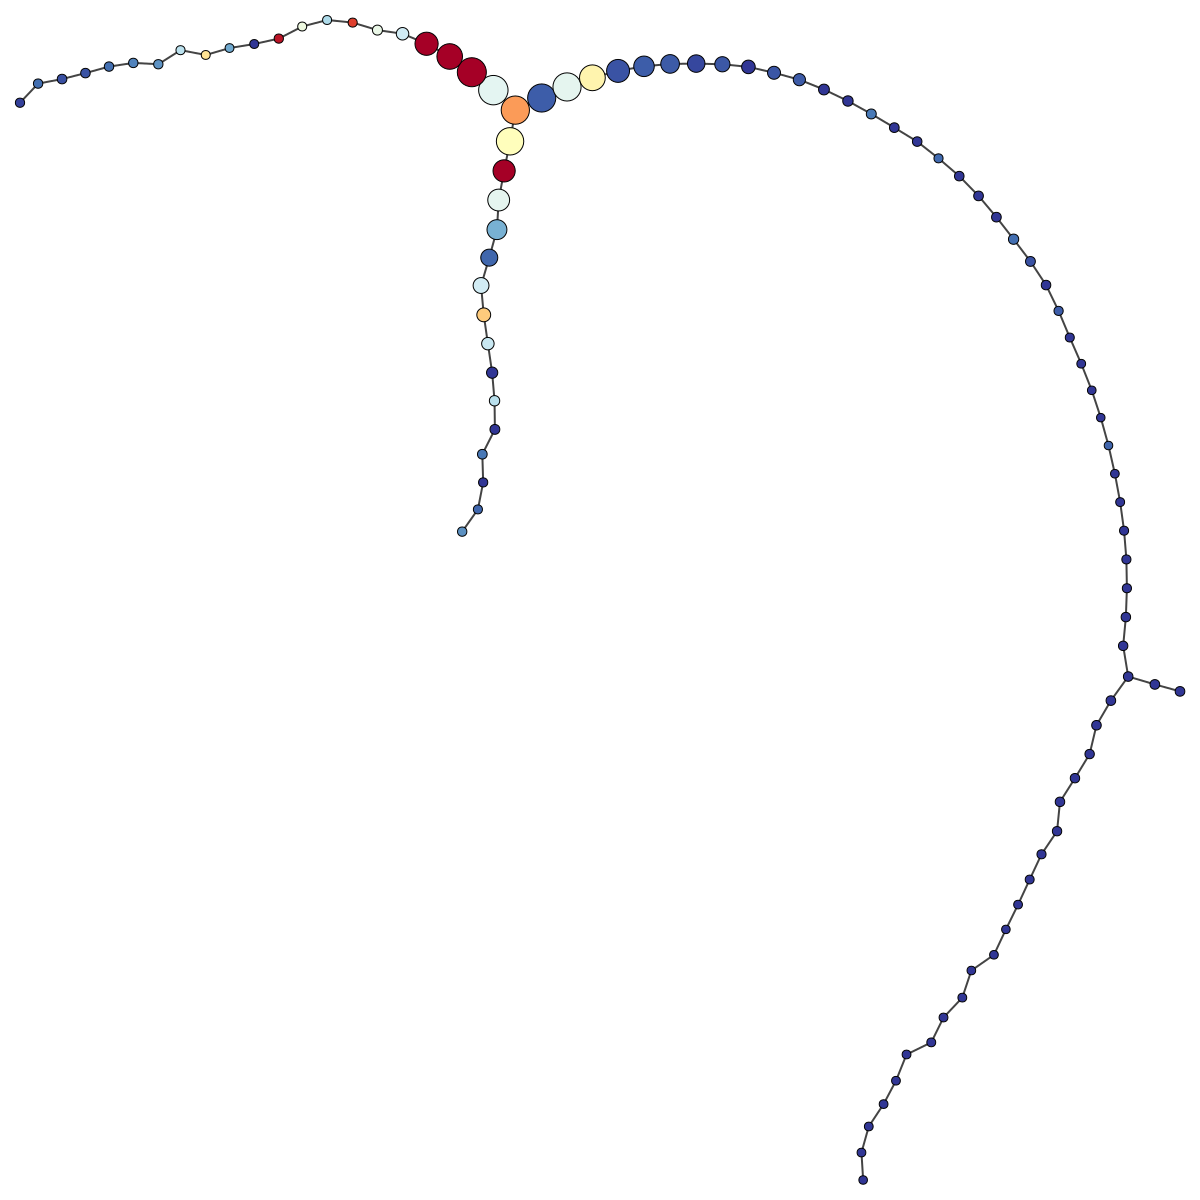

In [101]:
analysis.plot_save_graph( seed=seed, overlay=pd.Series(adata.obs_vector('LGR5')), file_out='LGR5', upper_range=15)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


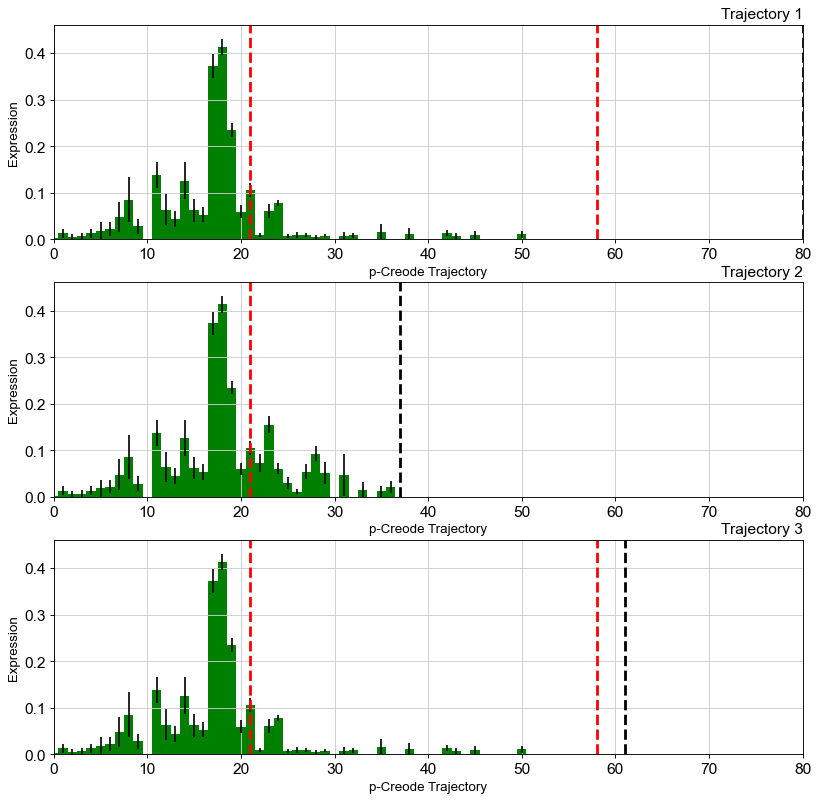

In [148]:
import matplotlib.pyplot as plt

analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('LGR5')), 0)
plt.savefig('Output_UC2samples/LGR5_graph.png')

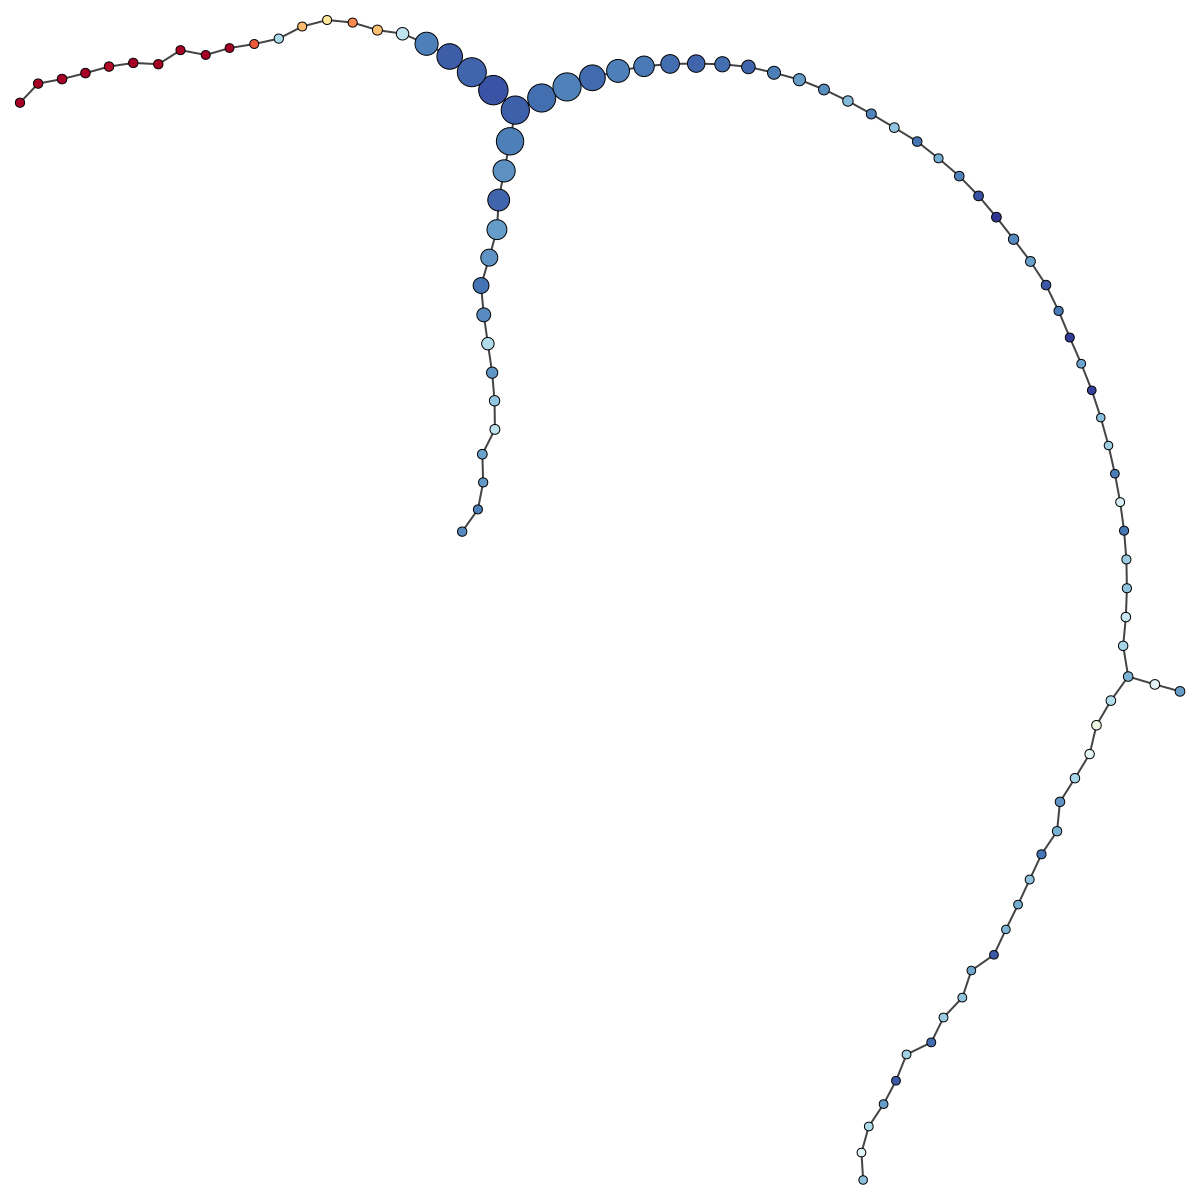

In [88]:
analysis.plot_save_graph( seed=seed, overlay=pd.Series(adata.obs_vector('MUC2')), file_out='MUC2', upper_range=3)

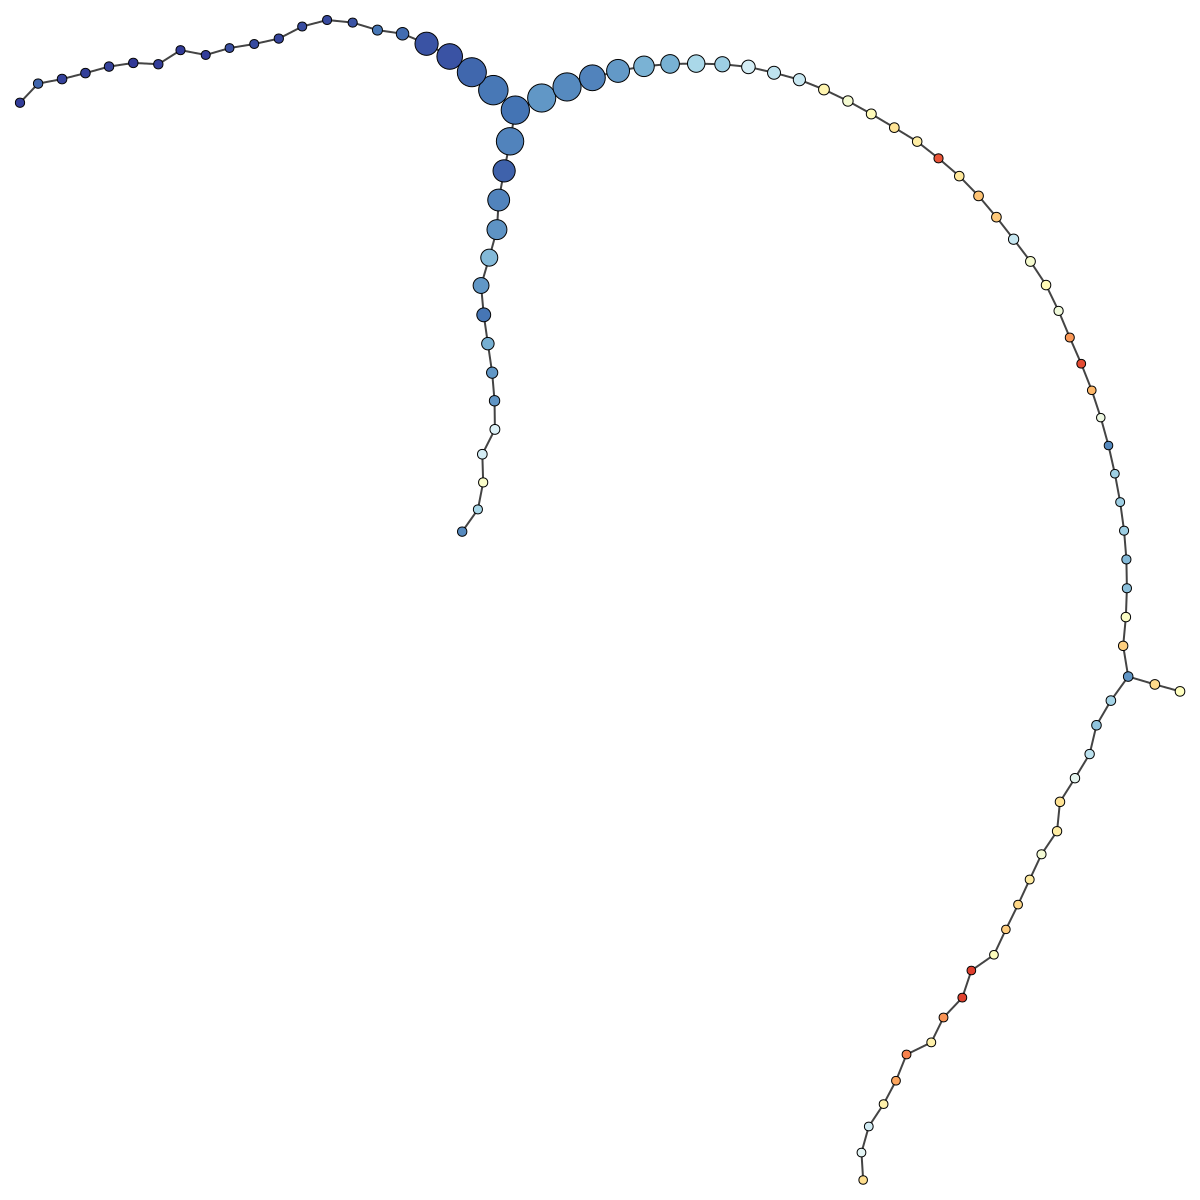

In [89]:
analysis.plot_save_graph( seed=seed, overlay=pd.Series(adata.obs_vector('CA2')), file_out='CA2', upper_range=2)

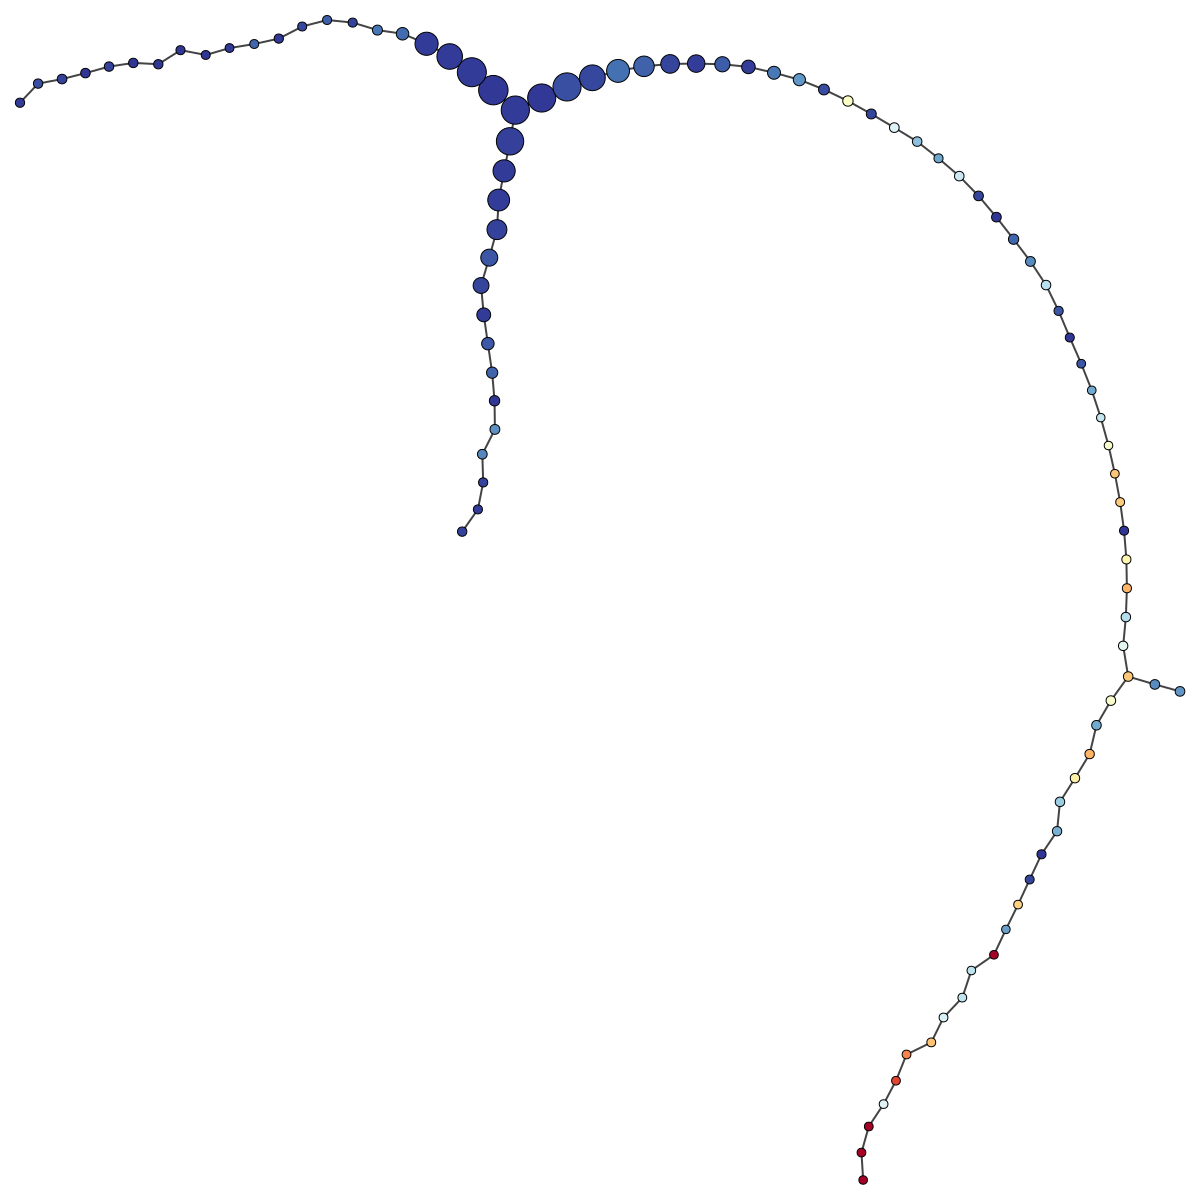

In [90]:
analysis.plot_save_graph( seed=seed, overlay=pd.Series(adata.obs_vector('BEST4')), file_out='BEST4', upper_range=5)

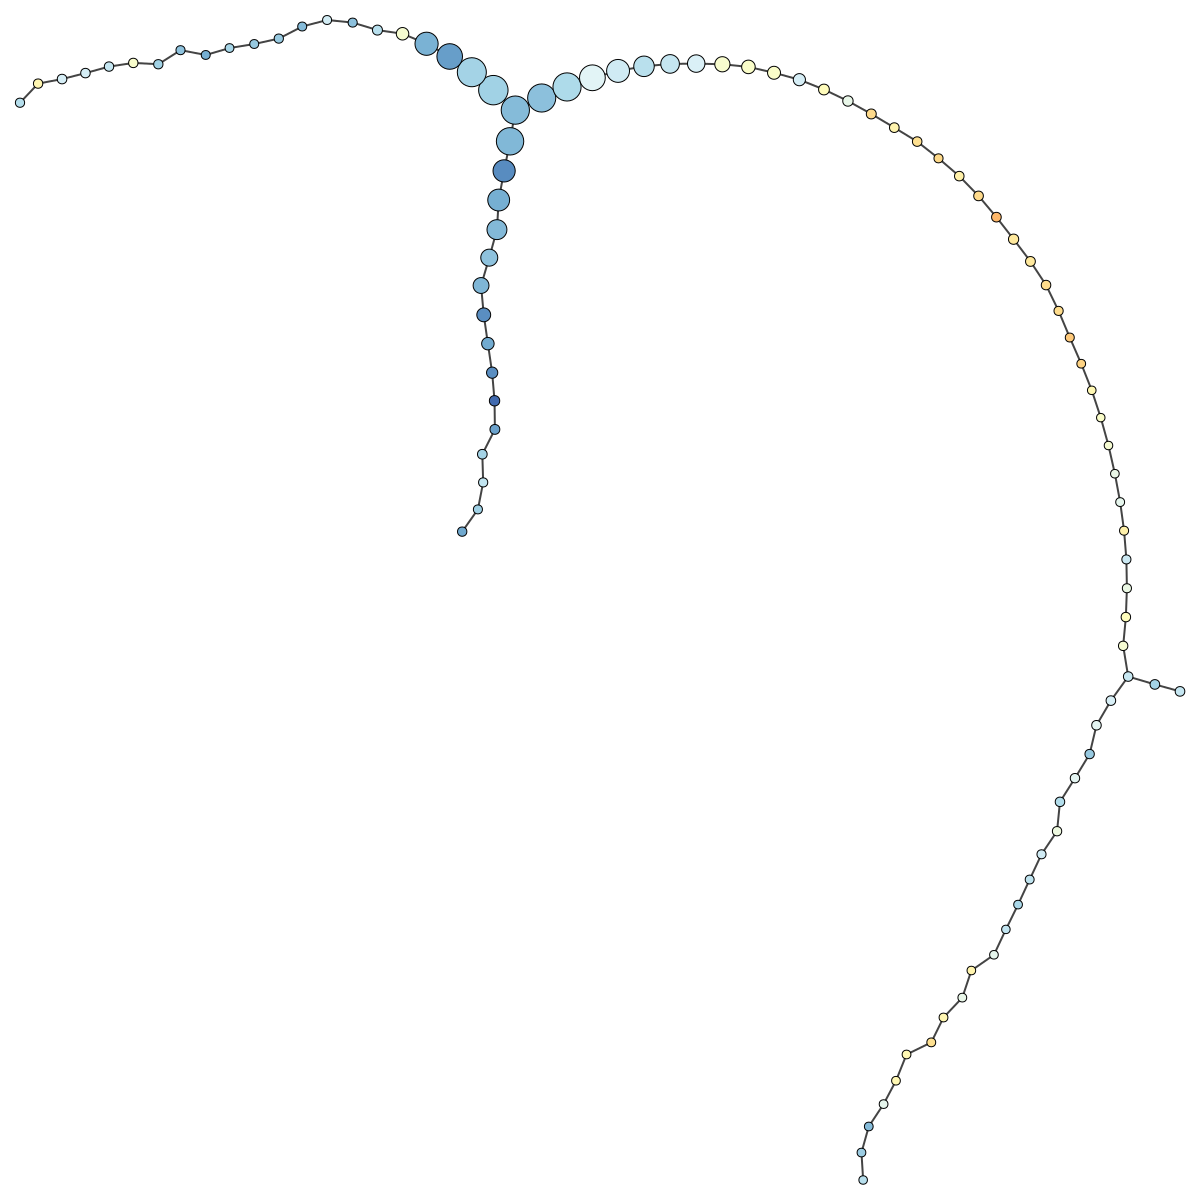

In [35]:
analysis.plot_save_graph( seed=seed, overlay=pd.Series(adata.obs_vector('S100P')), file_out='S100P', upper_range=1.25)

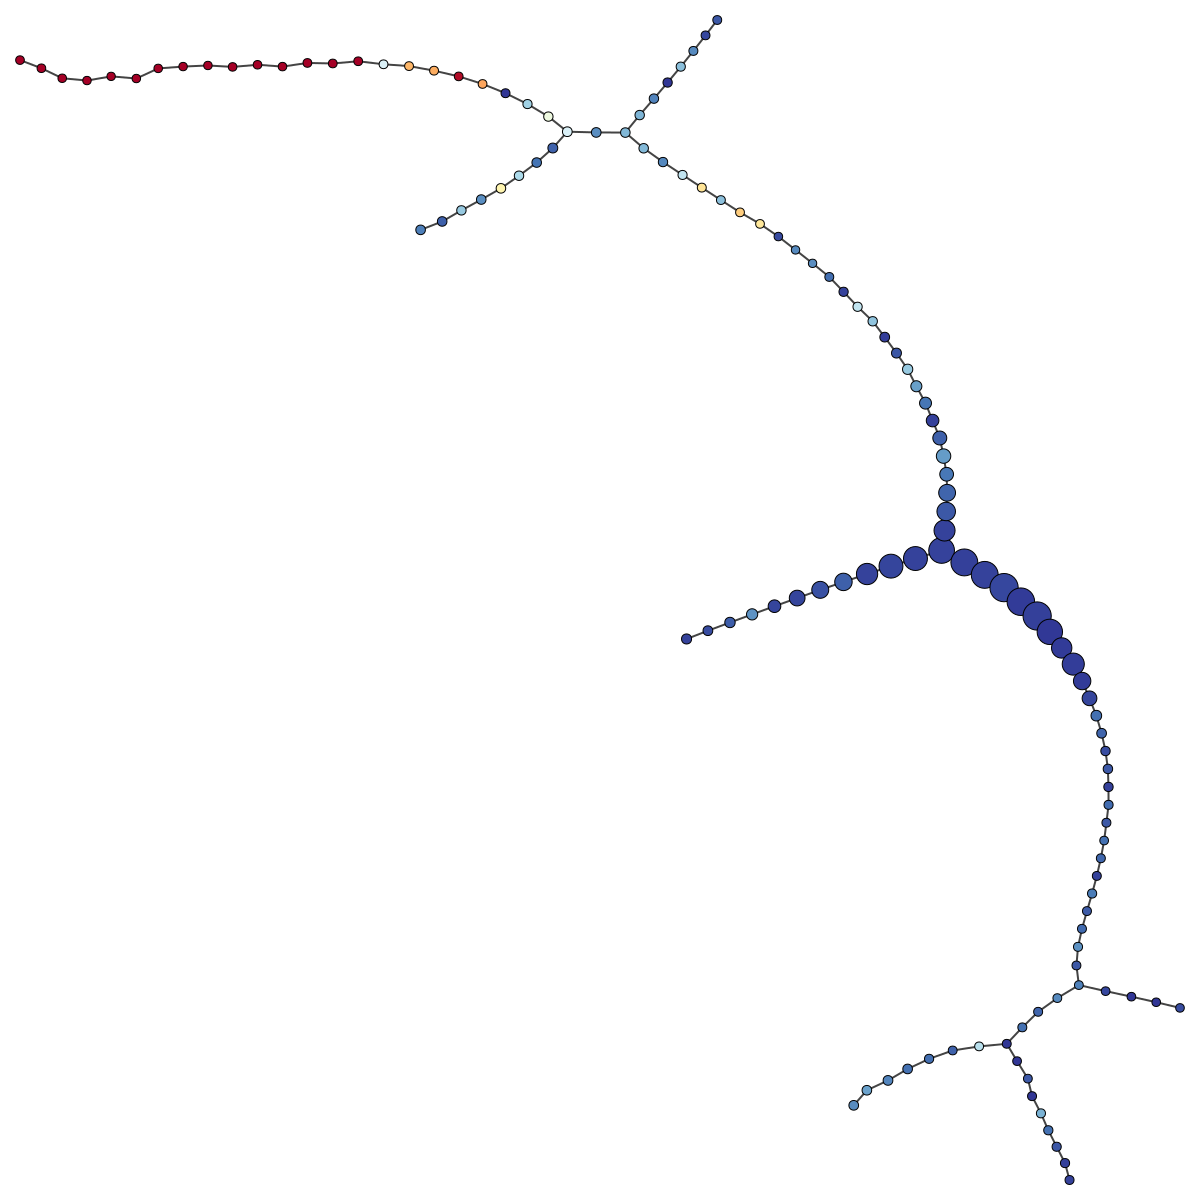

In [53]:
analysis.plot_save_graph( seed=seed, overlay=pd.Series(adata.obs_vector('GUCA2A')), file_out='210424_GUCA2A', upper_range=5)

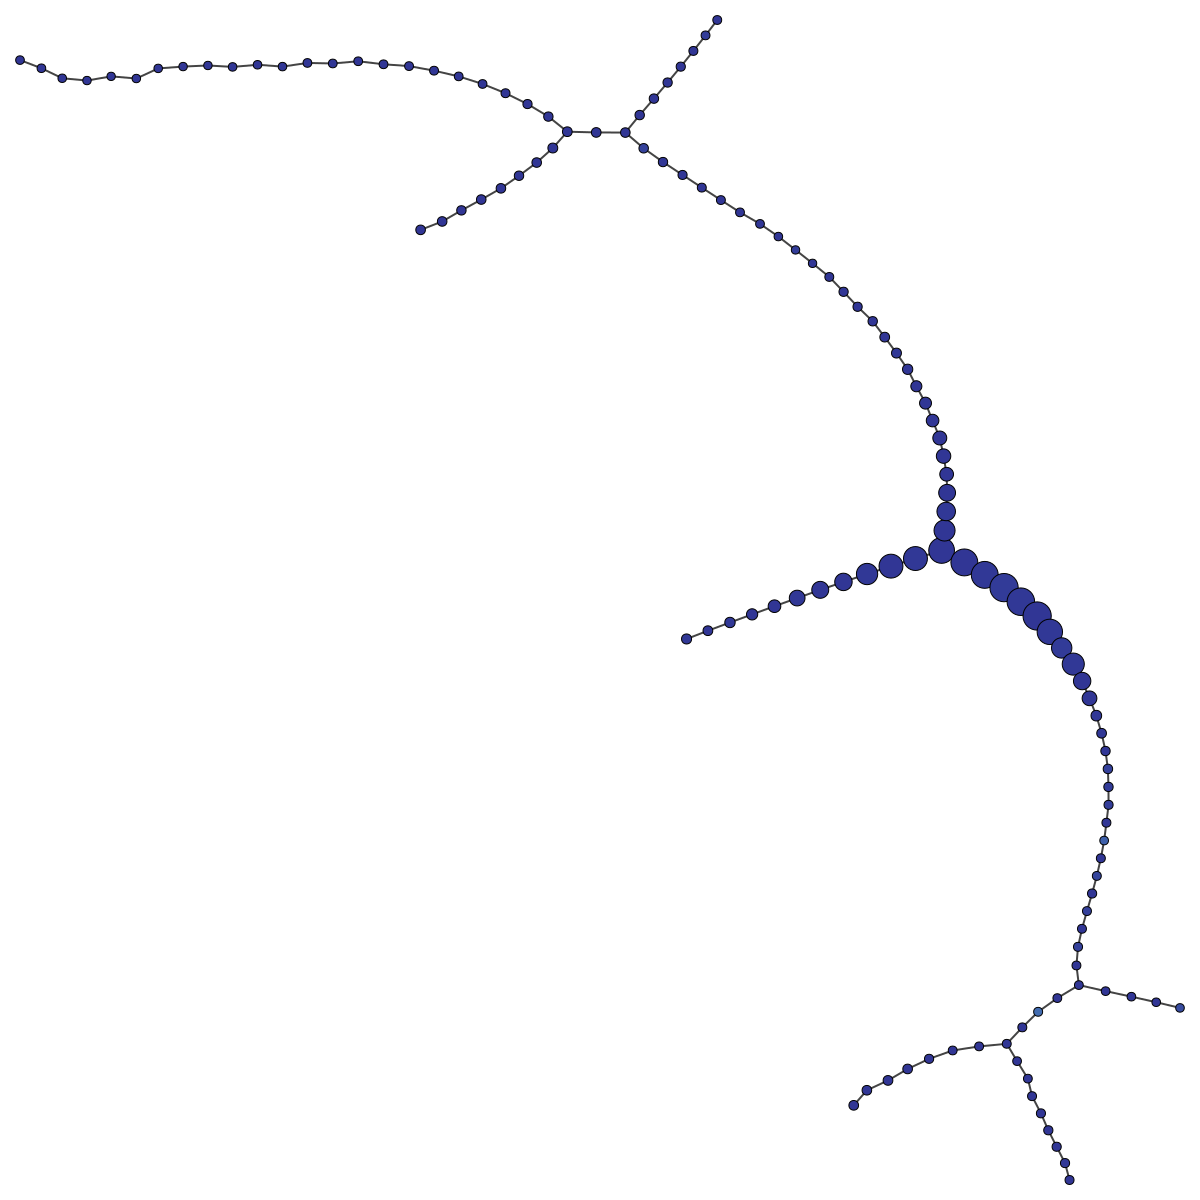

In [54]:
analysis.plot_save_graph( seed=seed, overlay=pd.Series(adata.obs_vector('TRPM5')), file_out='210424_TRPM5', upper_range=1.25)

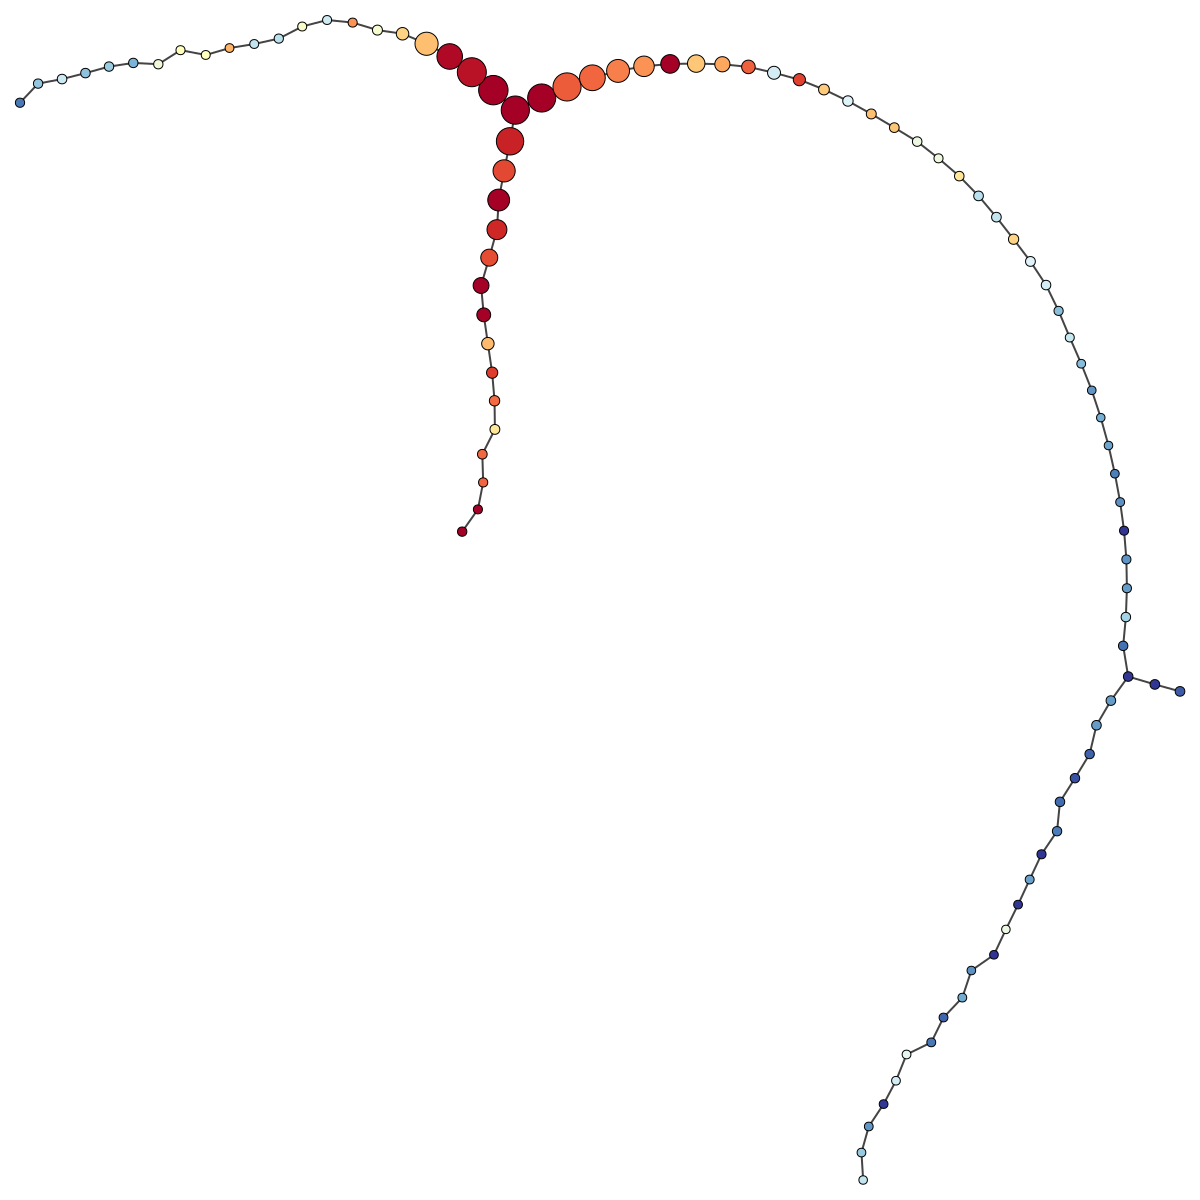

In [49]:
analysis.plot_save_graph( seed=seed, overlay=pd.Series(adata.obs_vector('HLA-DRA')), file_out='HLA-DRA', upper_range=5)

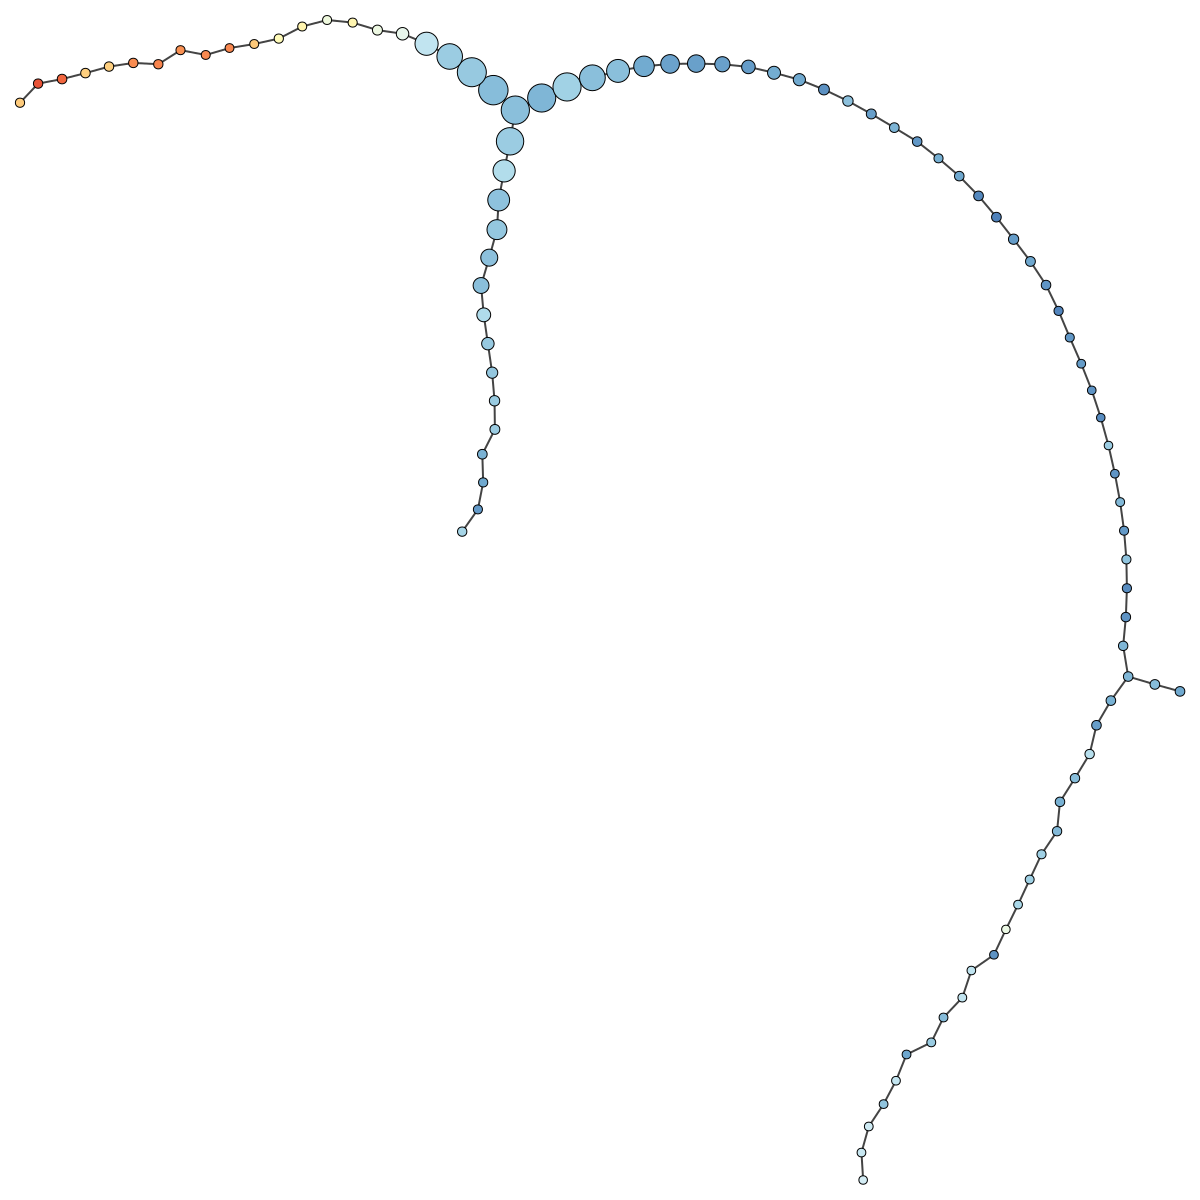

In [40]:
analysis.plot_save_graph( seed=seed, overlay=pd.Series(adata.obs_vector('TFF3')), file_out='TFF3', upper_range=1)

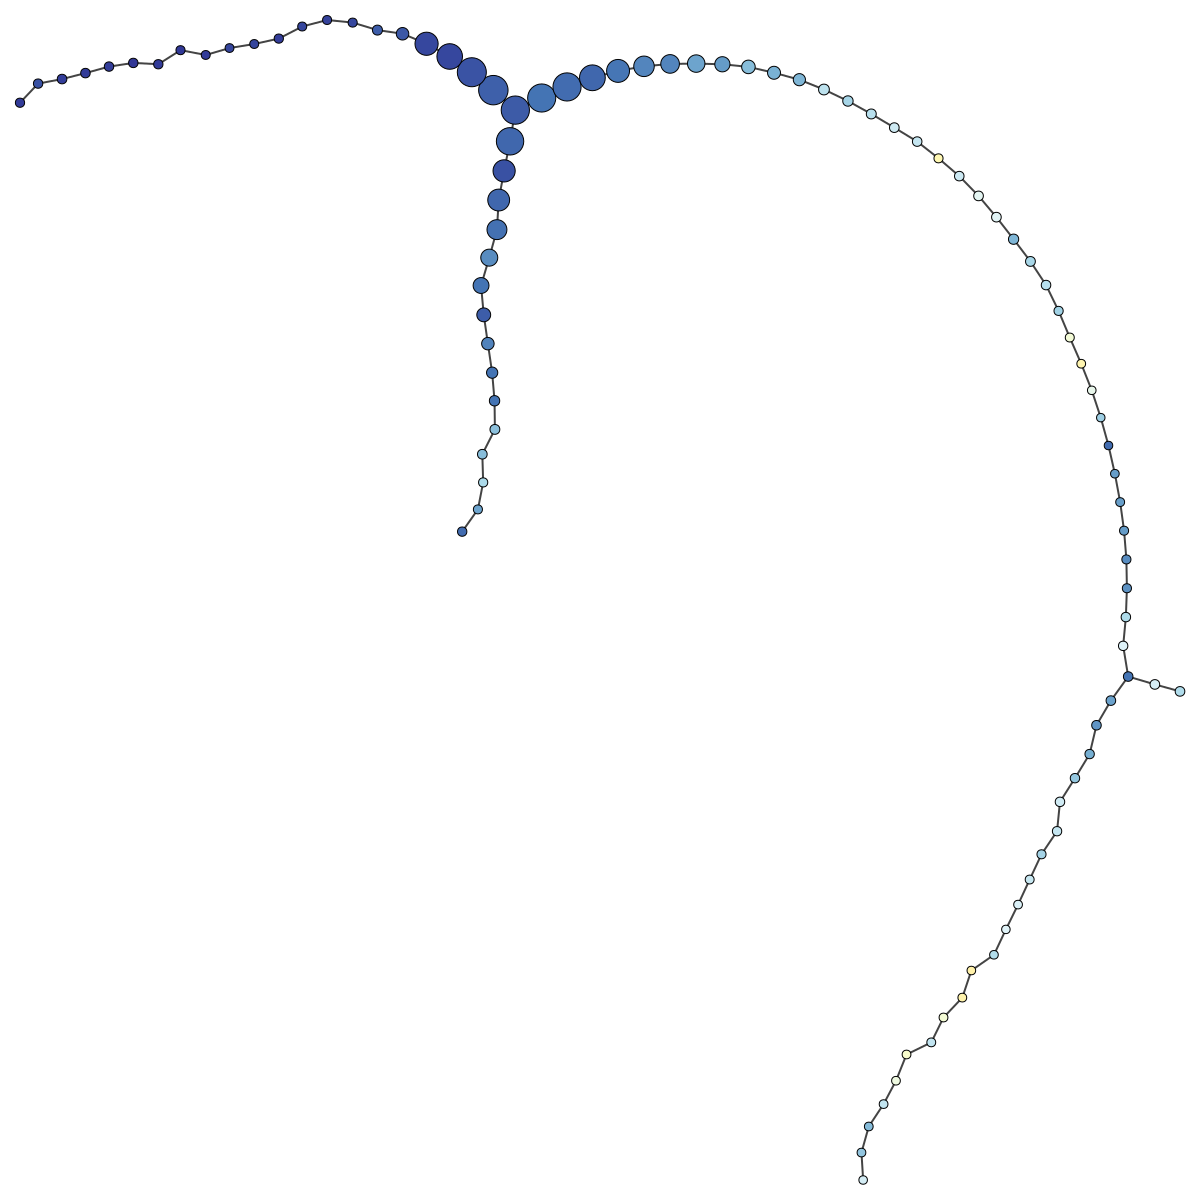

In [85]:
analysis.plot_save_graph( seed=seed, overlay=pd.Series(adata.obs_vector('CA2')), file_out='CA2', upper_range=1.25)

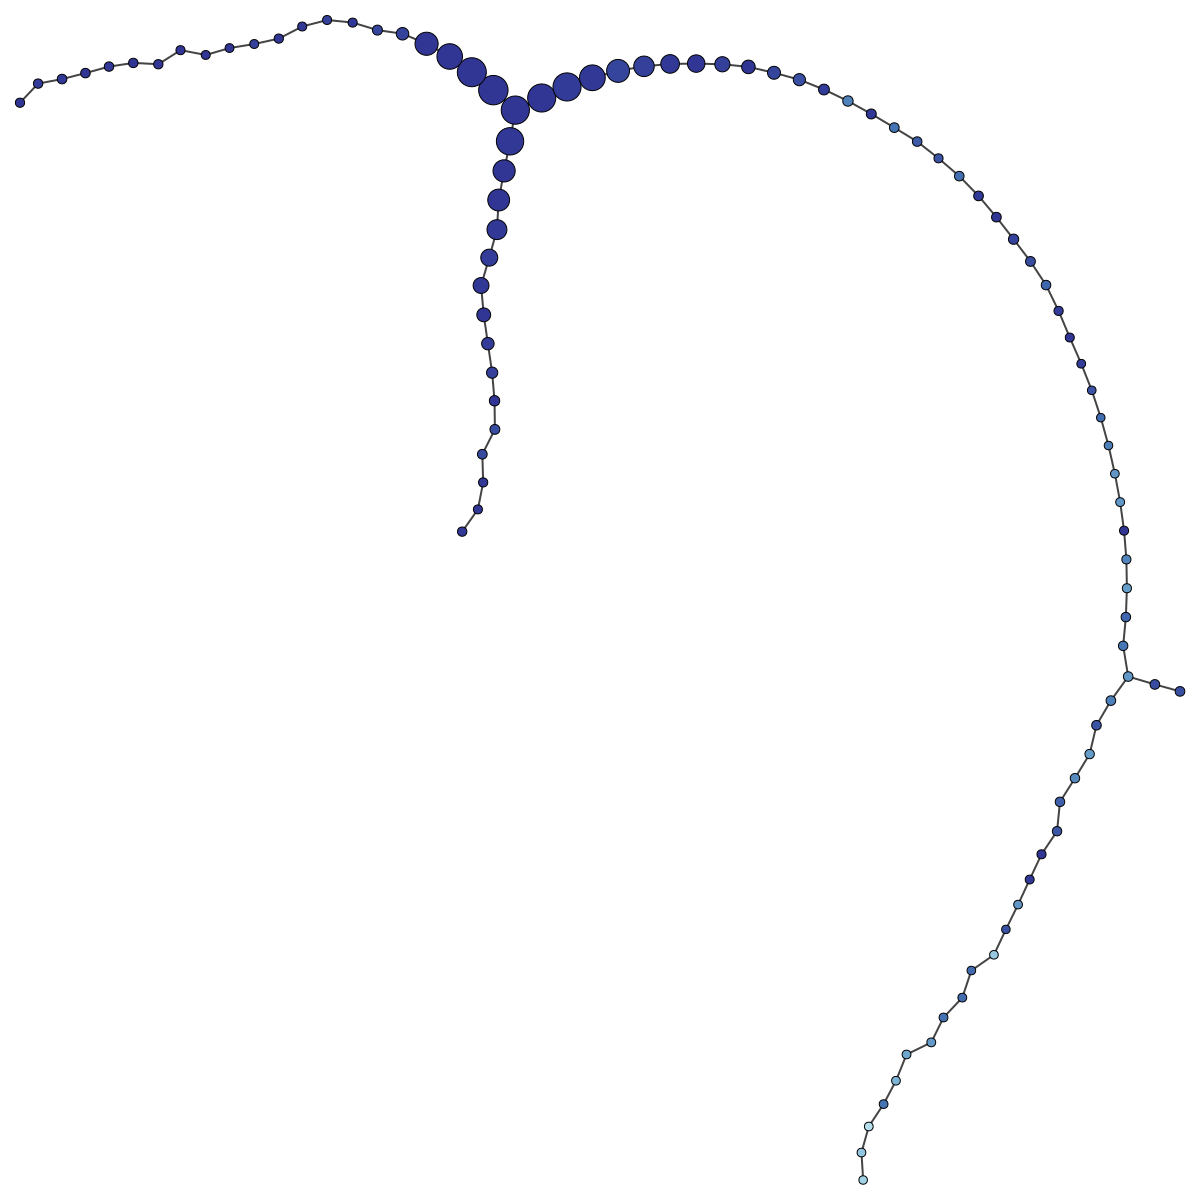

In [86]:
analysis.plot_save_graph( seed=seed, overlay=pd.Series(adata.obs_vector('BEST4')), file_out='BEST4', upper_range=1.25)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


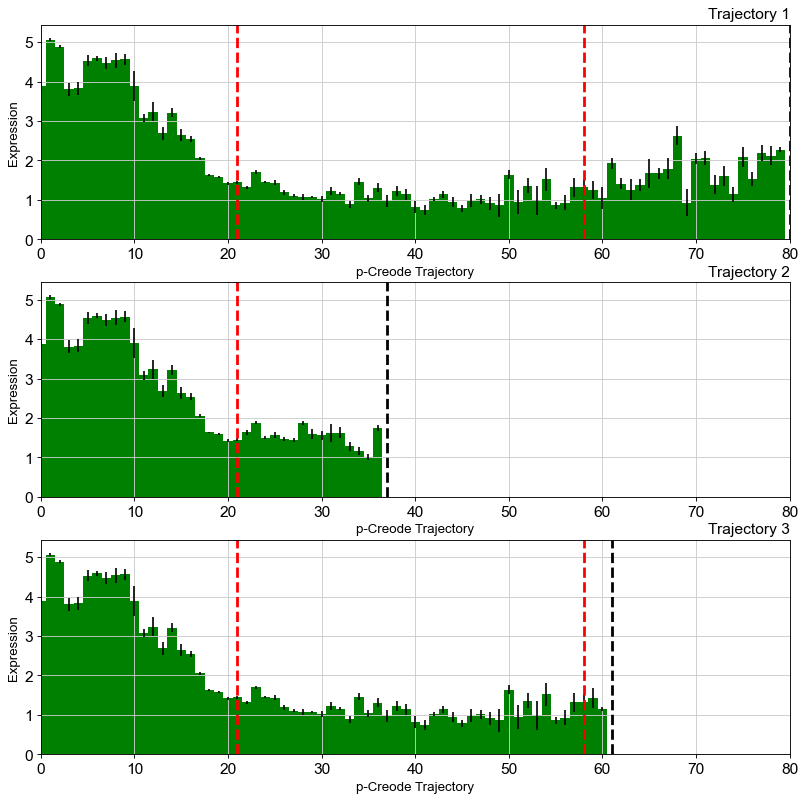

In [149]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('TFF3')), 0)
plt.savefig('Output_UC2samples/TFF3_graph.png')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


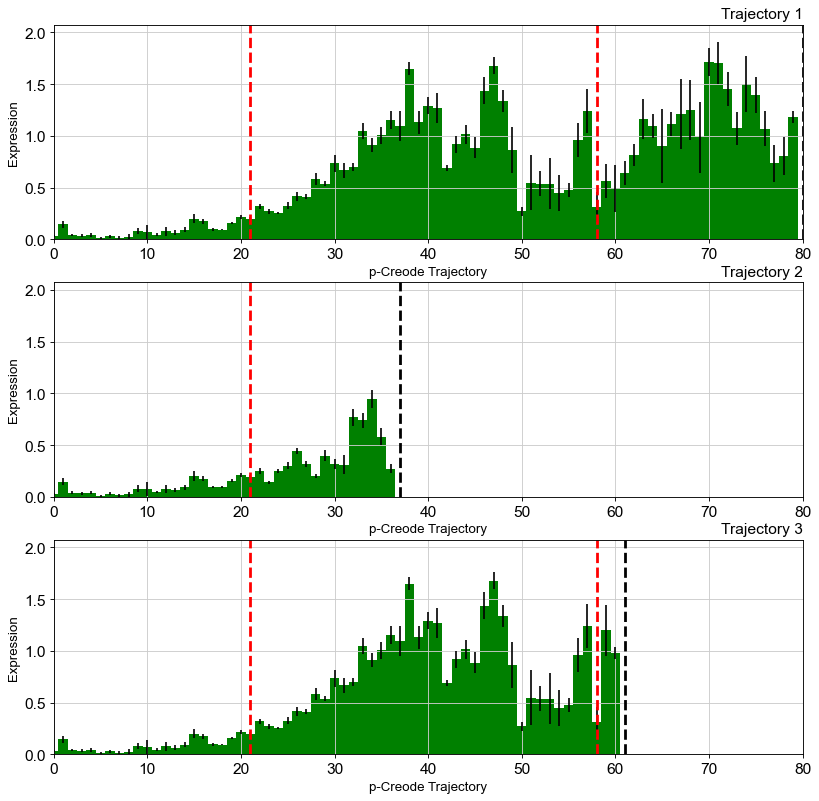

In [150]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('CA2')), 0)
plt.savefig('Output_UC2samples/CA2_graph.png')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


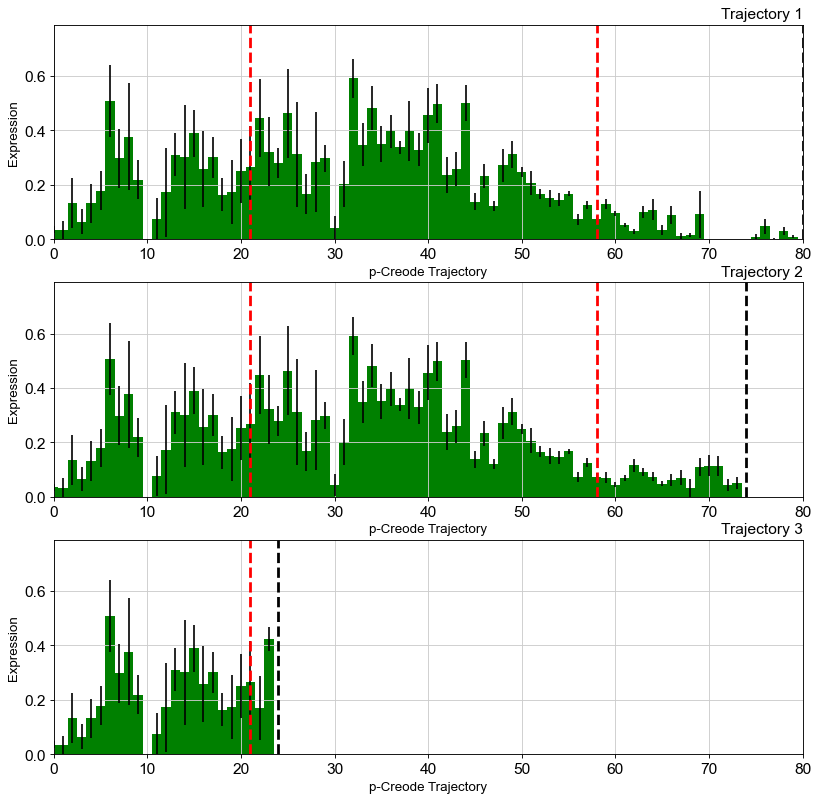

In [104]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('NPSR1')), 1)
plt.savefig('Output_UC2samples/NPSR1_graph.png')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


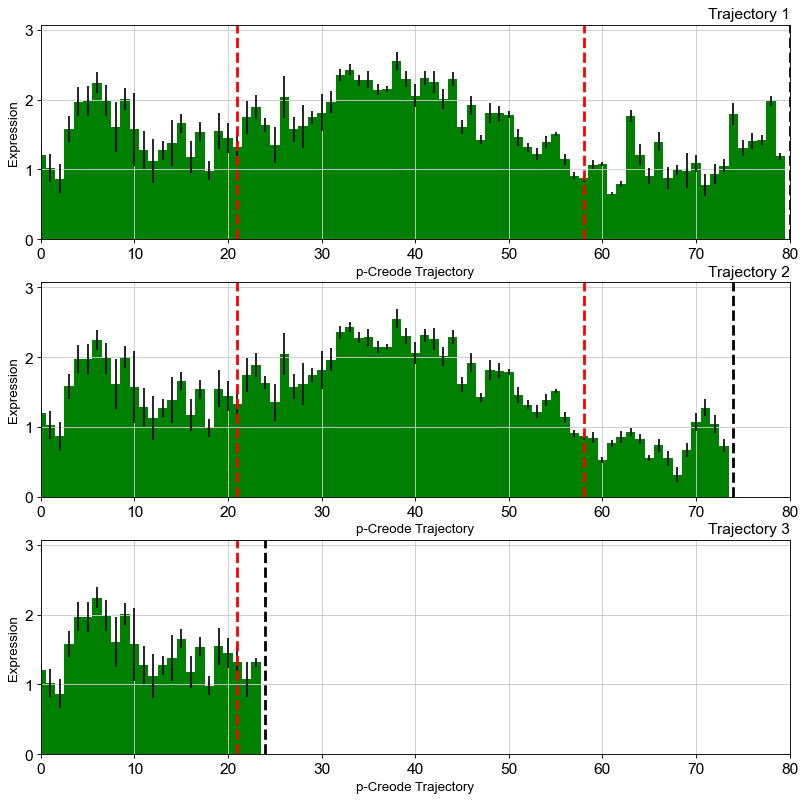

In [105]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('S100P')), 1)
plt.savefig('Output_UC2samples/S100P_graph.png')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


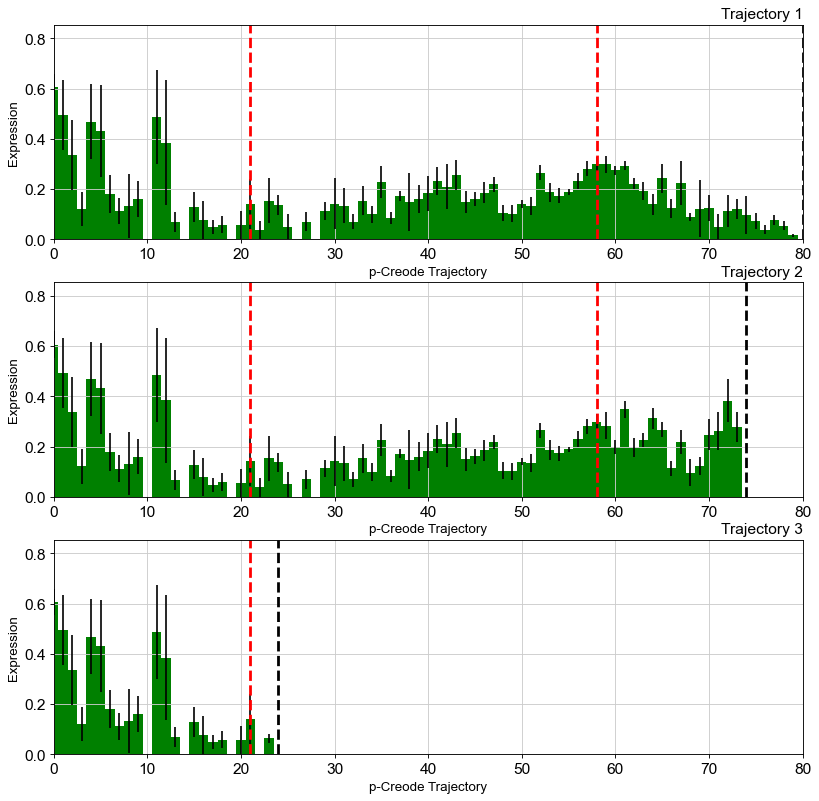

In [106]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('HLA-DRB5')), 1)
plt.savefig('Output_UC2samples/HLA-DRB5_graph.png')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


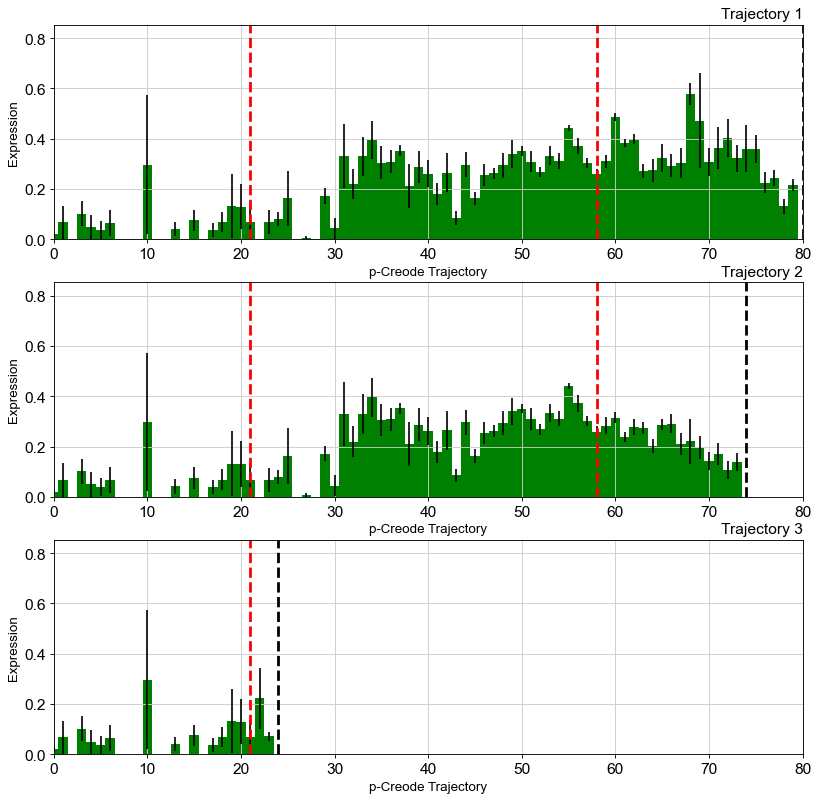

In [107]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('SESN3')), 1)
plt.savefig('Output_UC2samples/SESN3_graph.png')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


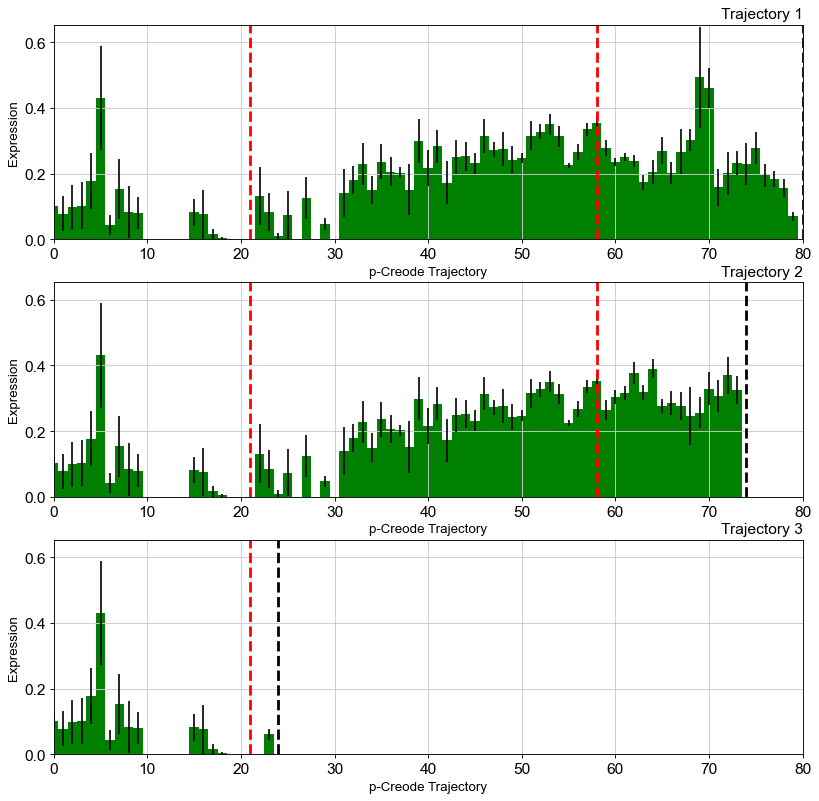

In [108]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('EIF1AY')), 1)
plt.savefig('Output_UC2samples/EIF1AY_graph.png')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


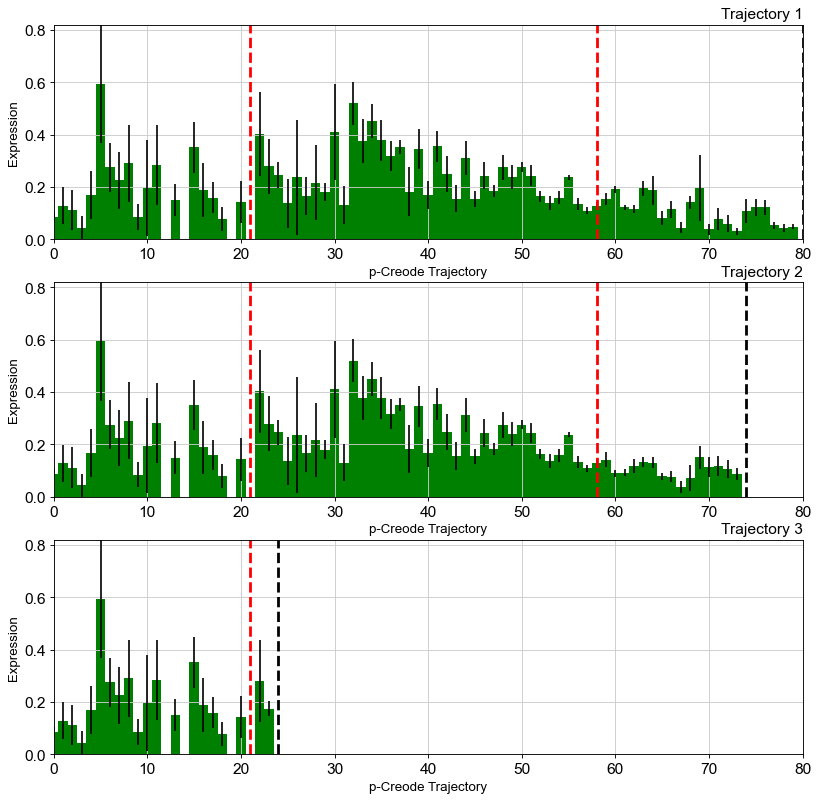

In [109]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('SERPINB5')), 1)
plt.savefig('Output_UC2samples/SERPINB5_graph.png')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


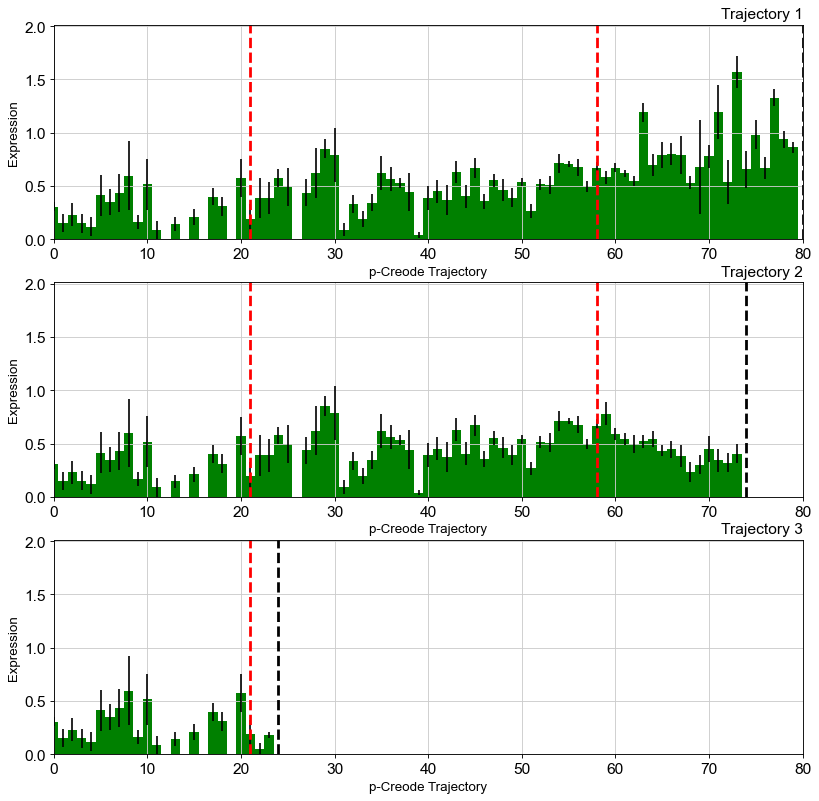

In [110]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('LYZ')), 1)
plt.savefig('Output_UC2samples/LYZ_graph.png')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


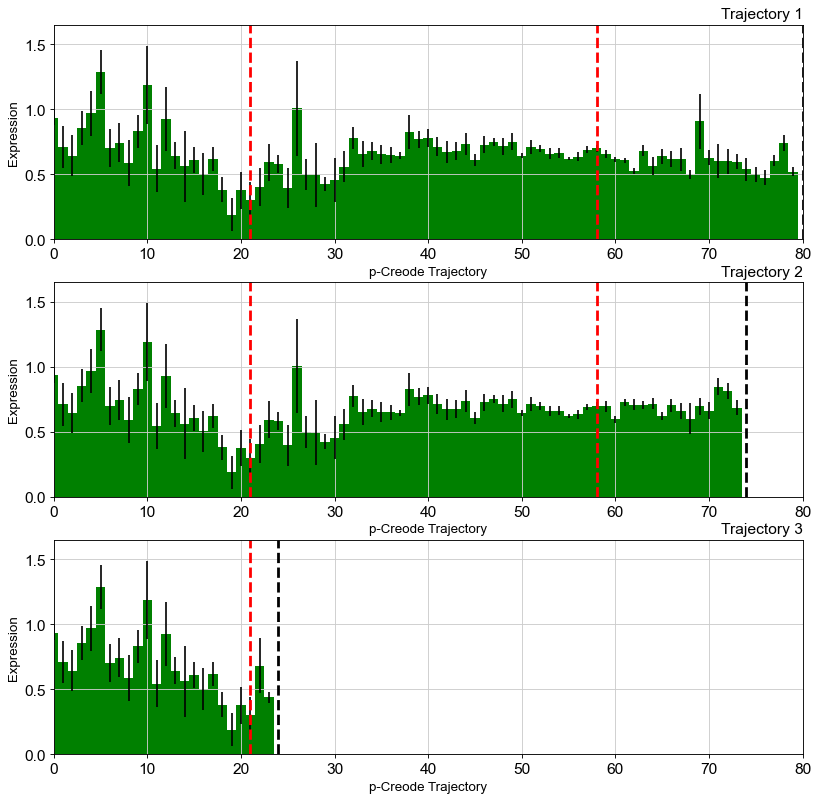

In [111]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('HLA-F')), 1)
plt.savefig('Output_UC2samples/HLA-F_graph.png')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


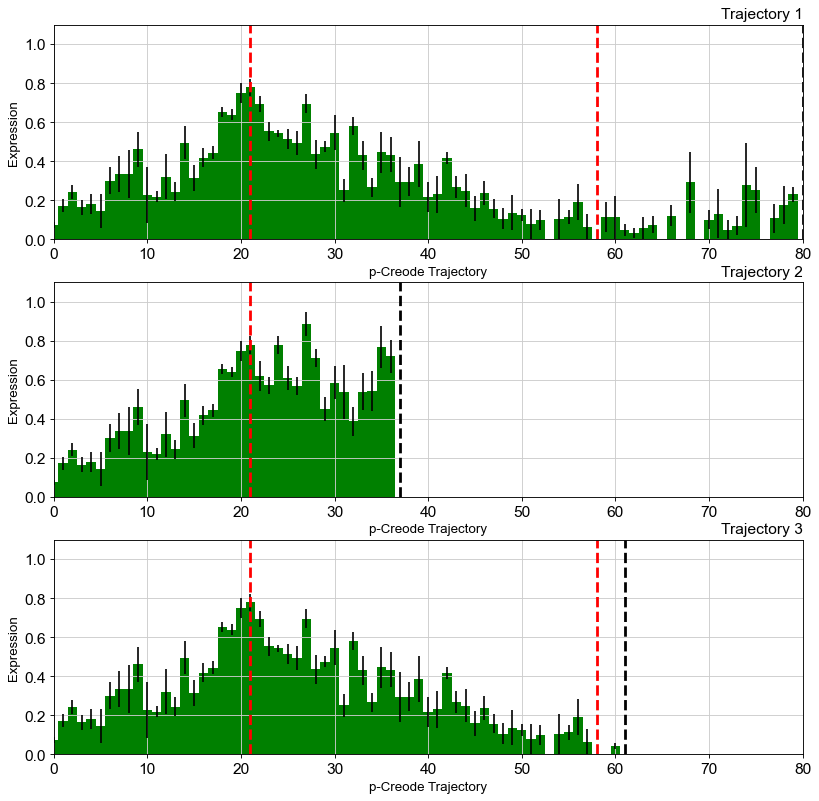

In [151]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('HLA-DRA')), 0)
plt.savefig('Output_UC2samples/HLA-DRA_graph.png')

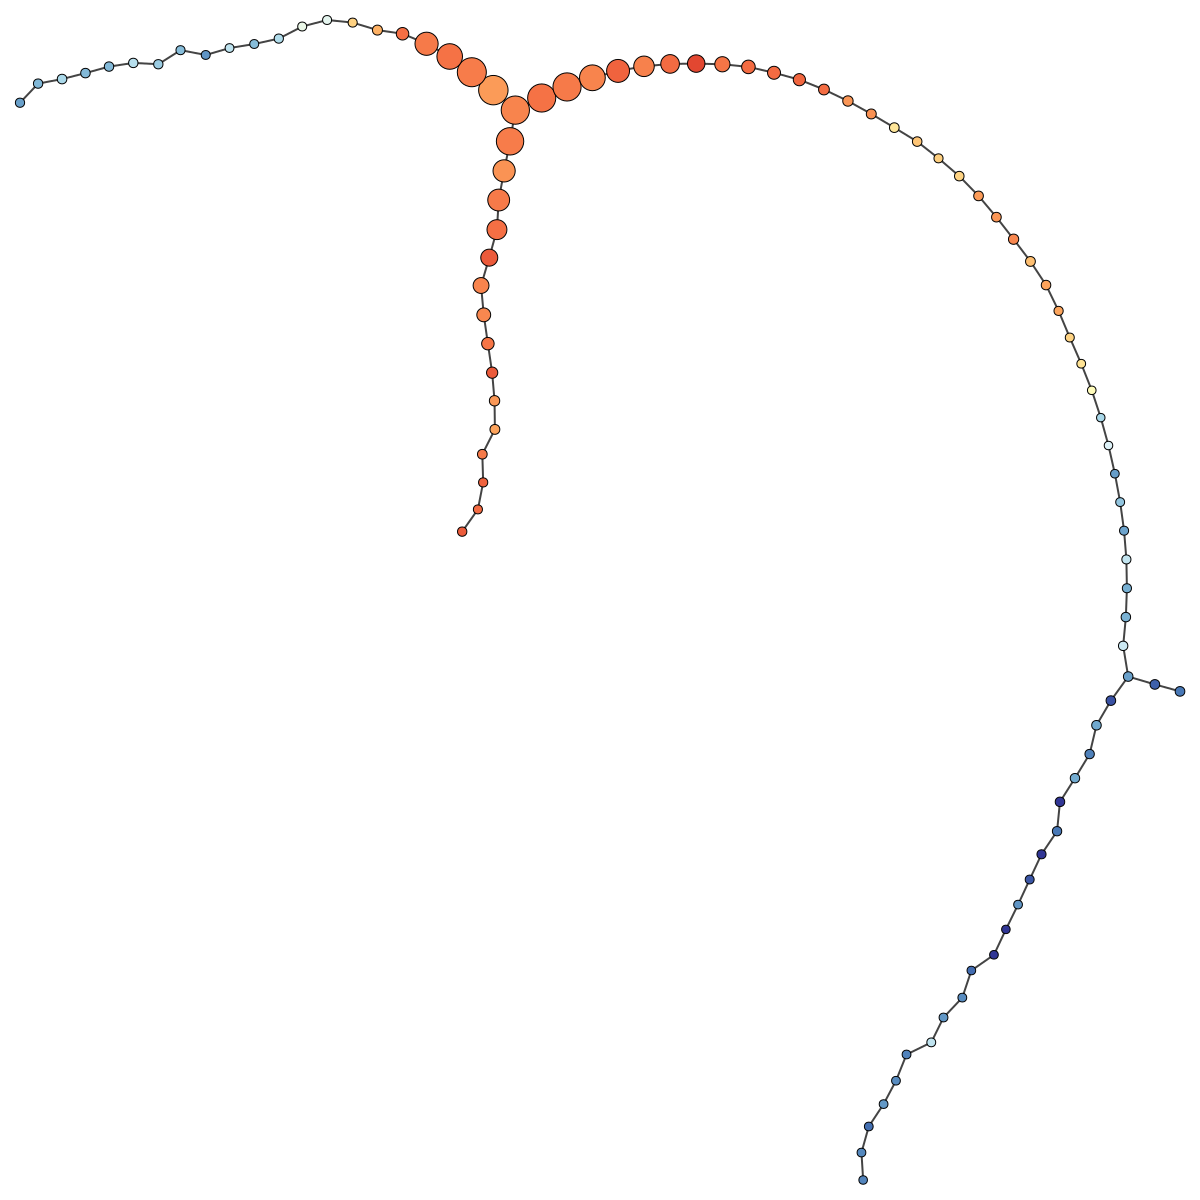

In [52]:
analysis.plot_save_graph( seed=seed, overlay=pd.Series(adata.obs_vector('LEFTY1')), file_out='LEFTY1', upper_range=1.5)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


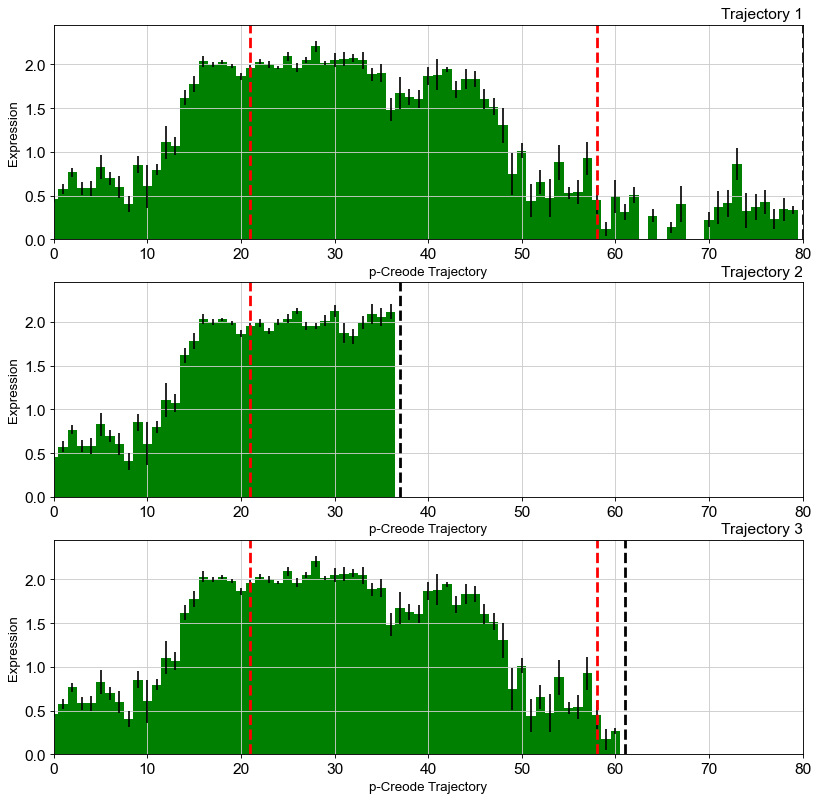

In [152]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('LEFTY1')), 0)
plt.savefig('Output_UC2samples/LEFTY1_graph.png')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


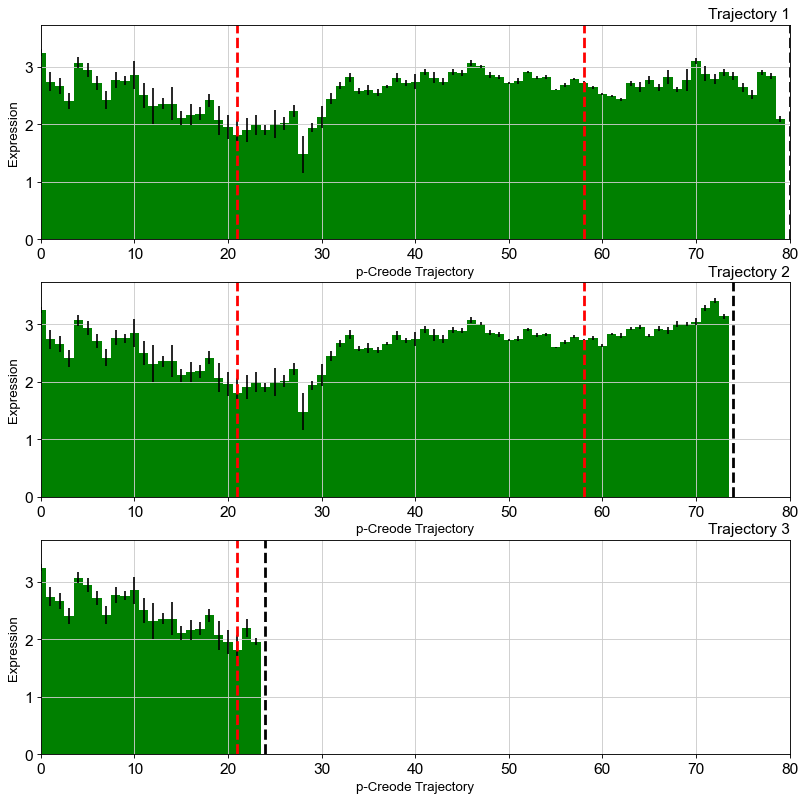

In [114]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('HLA-B')), 1)
plt.savefig('Output_UC2samples/HLA-B_graph.png')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


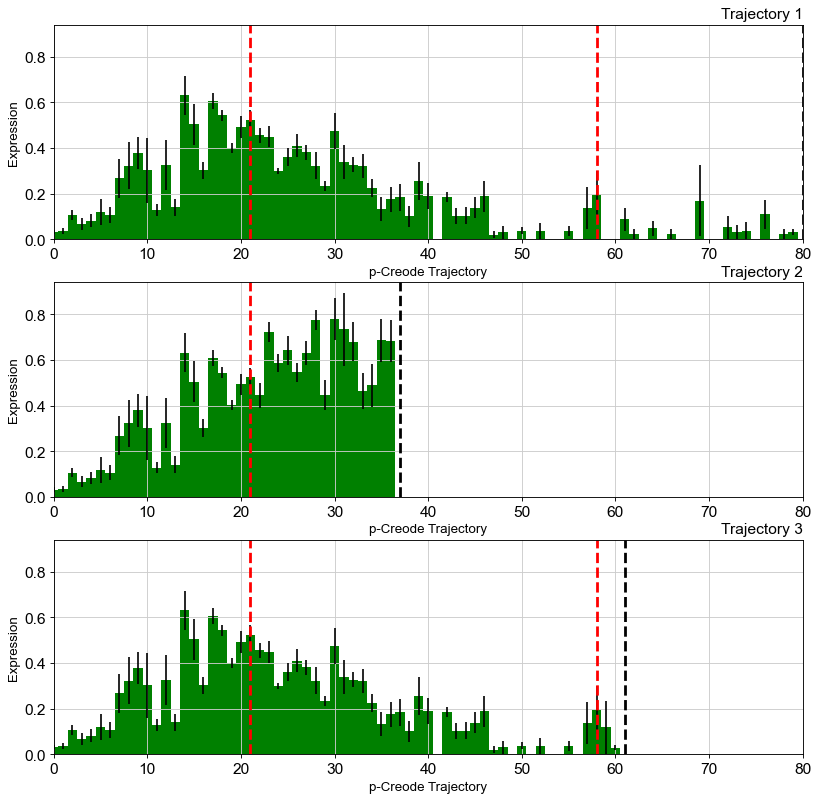

In [153]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('RARRES2')), 0)
plt.savefig('Output_UC2samples/RARRES2_graph.png')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


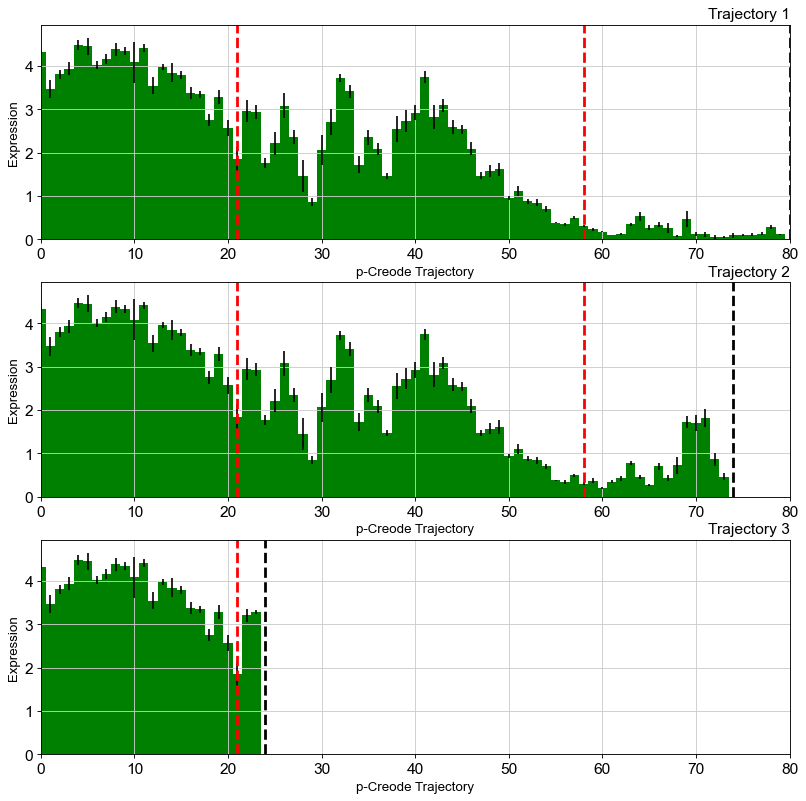

In [116]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('FABP1')), 1)
plt.savefig('Output_UC2samples/FABP1_graph.png')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


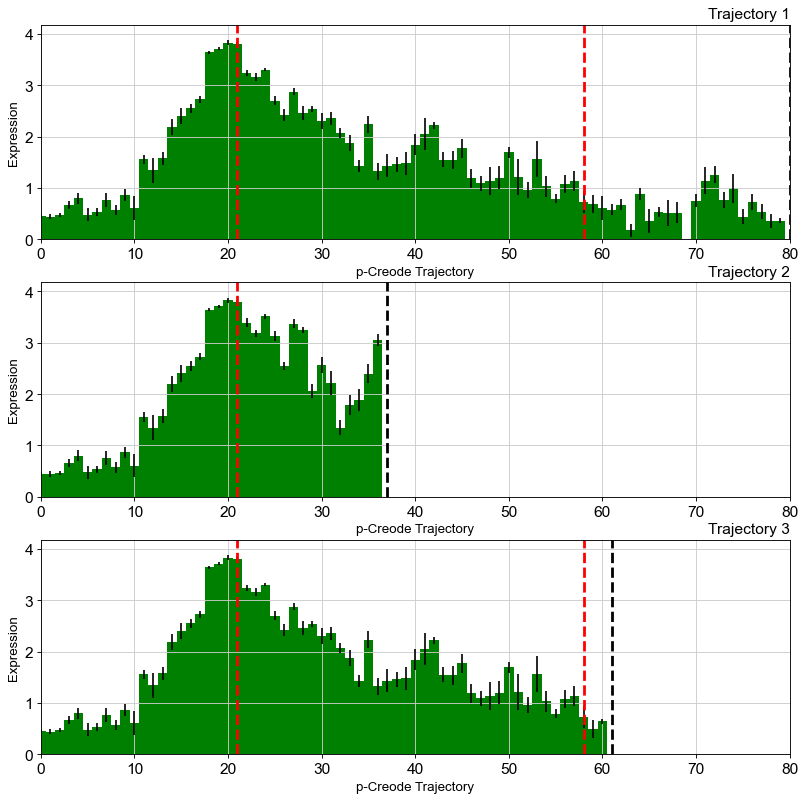

In [154]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('OLFM4')), 0)
plt.savefig('Output_UC2samples/OLFM4_graph.png')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


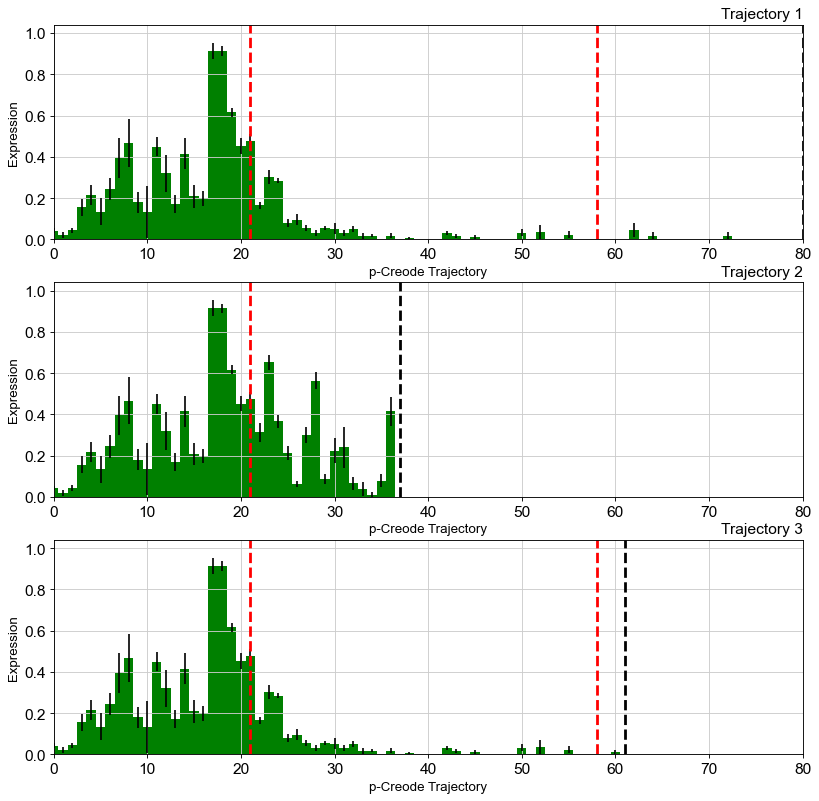

In [155]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('ASCL2')), 0)
plt.savefig('Output_UC2samples/ASCL2_graph.png')

In [142]:
from sklearn.cluster import KMeans

num_clusters = 3
clust_model = KMeans(n_clusters=num_clusters, random_state=3).fit( pca_reduced_data)
qual_data = clust_model.labels_
qual_data

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [143]:
str_qual_data = qual_data.astype( str)
str_qual_data

array(['1', '1', '1', ..., '2', '1', '1'], dtype='<U11')

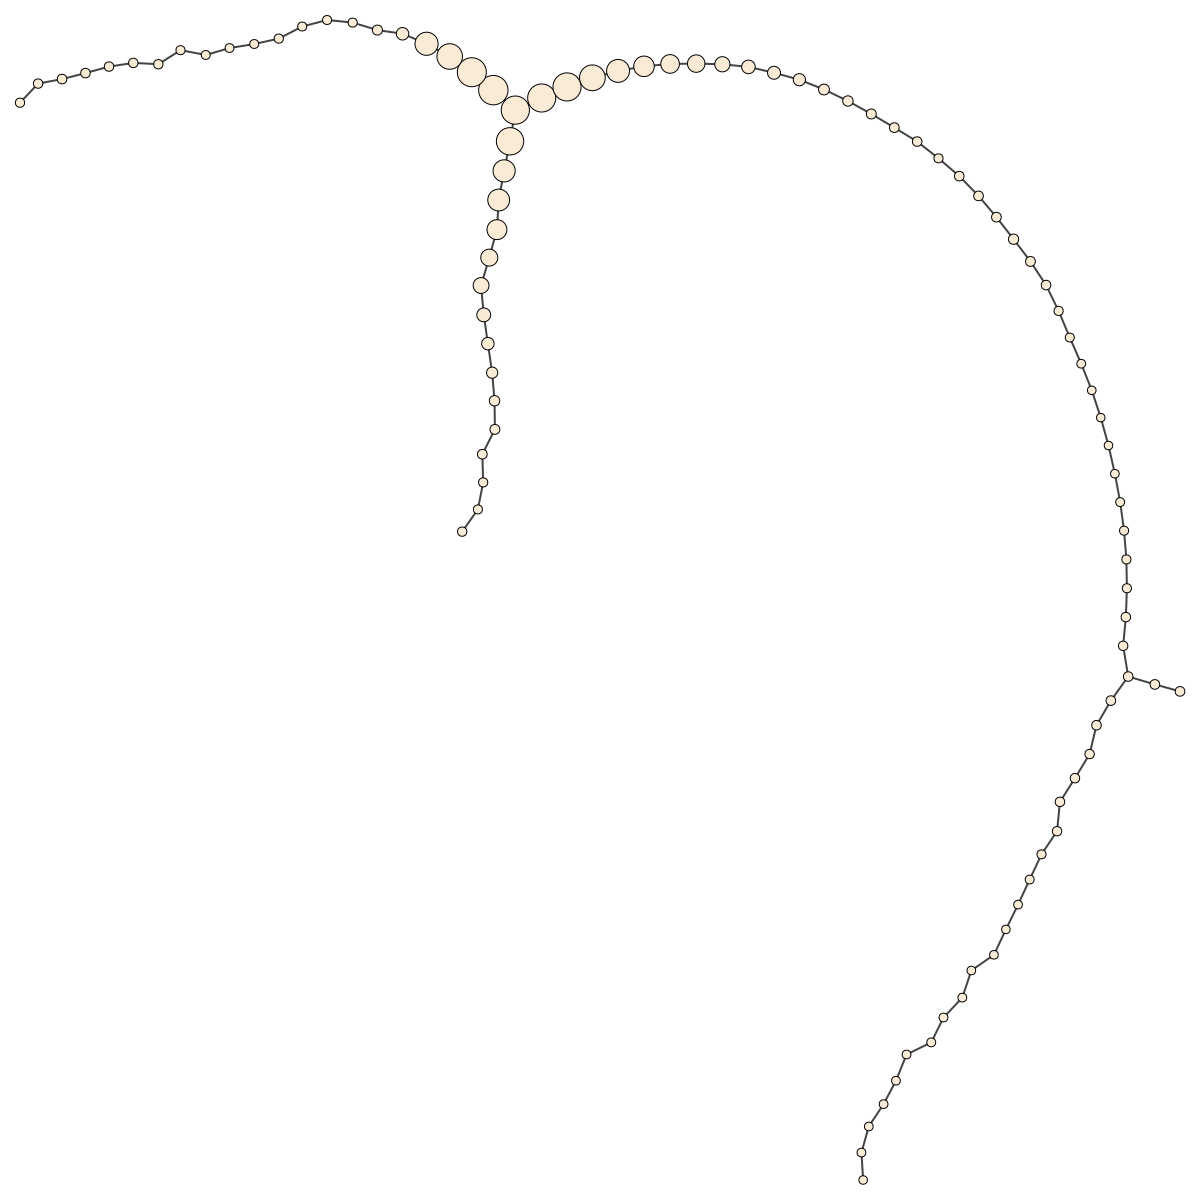

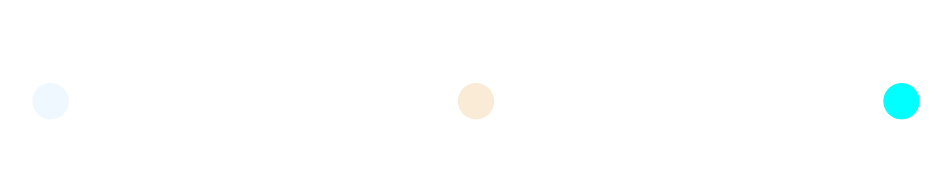

In [144]:
analysis.plot_save_qual_graph( seed=seed, overlay=str_qual_data, file_out='3_clusters_overlay')

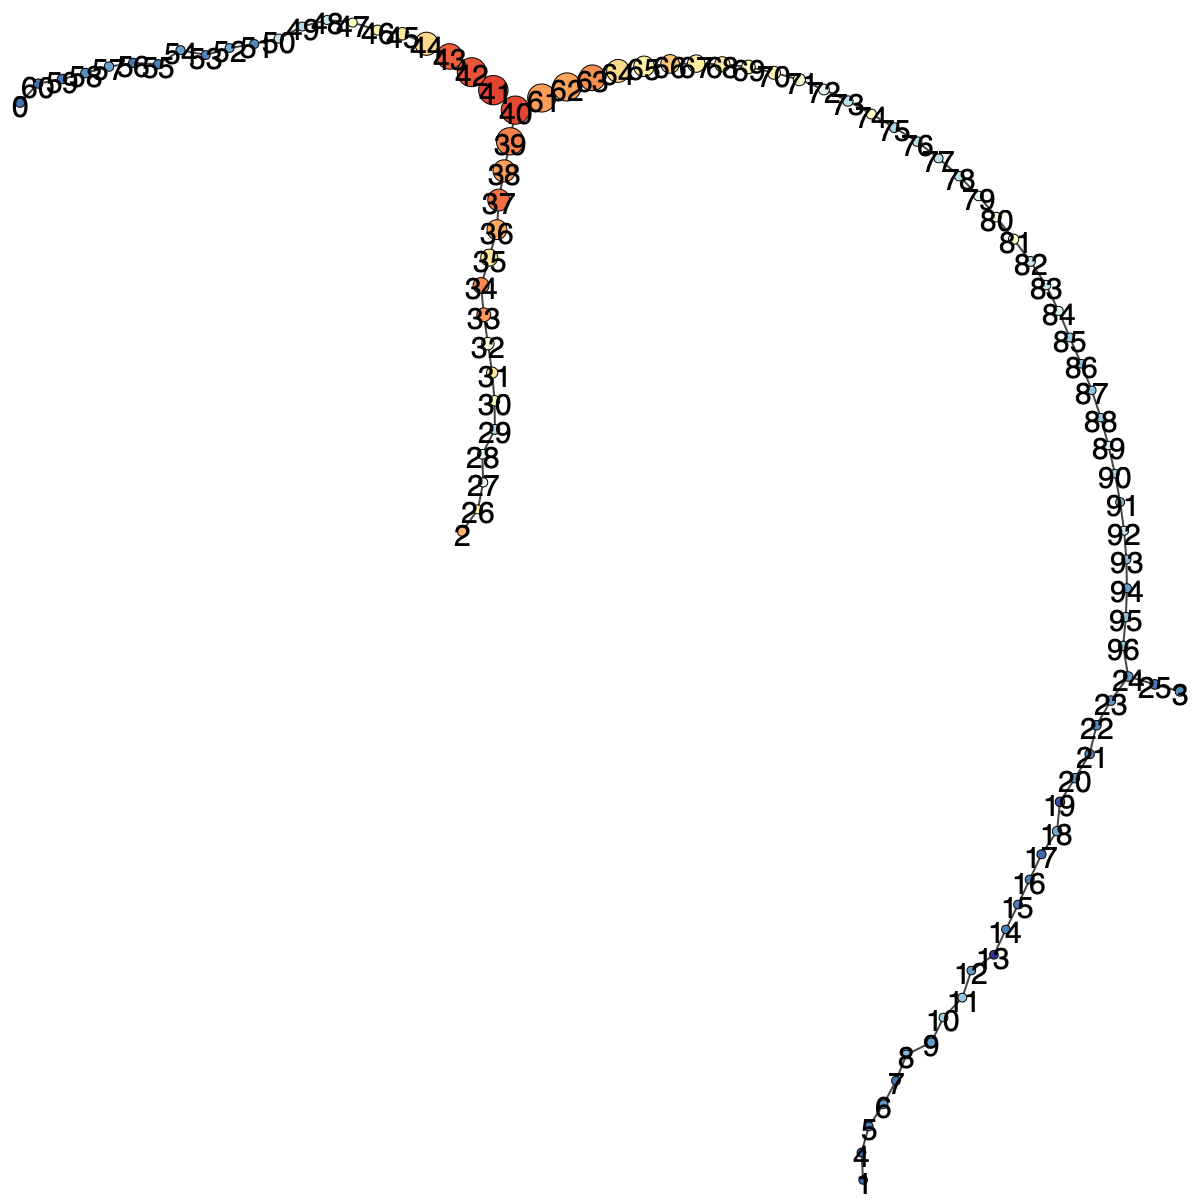

In [145]:
analysis.plot_save_graph( seed=seed, overlay=pd.Series(adata.obs_vector('OLFM4')), file_out='OLFM4_labeled', upper_range=1.25, node_label_size=30)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


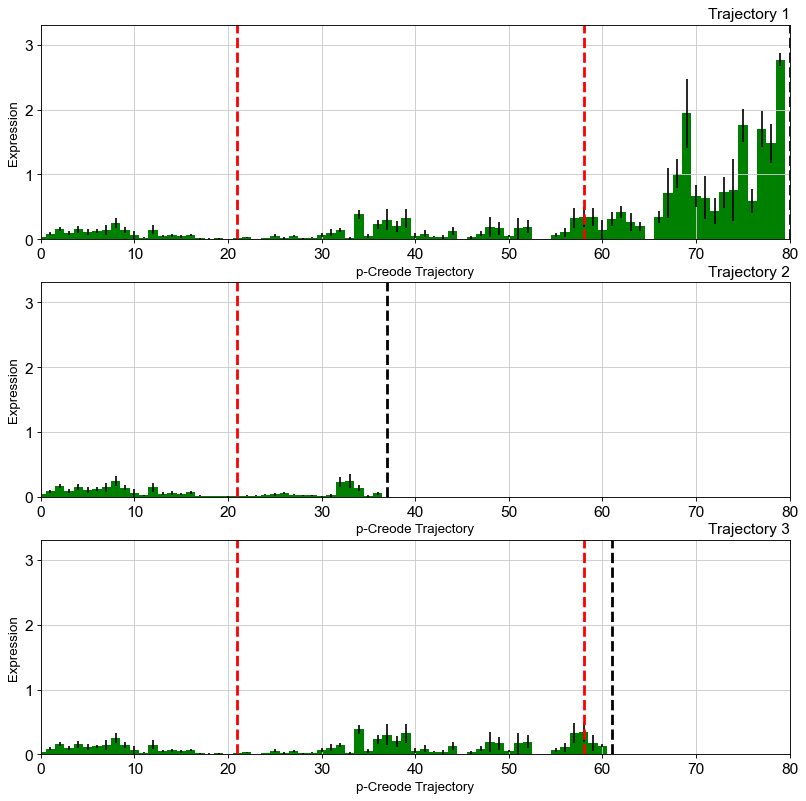

In [41]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('GUCA2A')), 0)
plt.savefig('Output_UC2samples/GUCA2A_graph.png')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


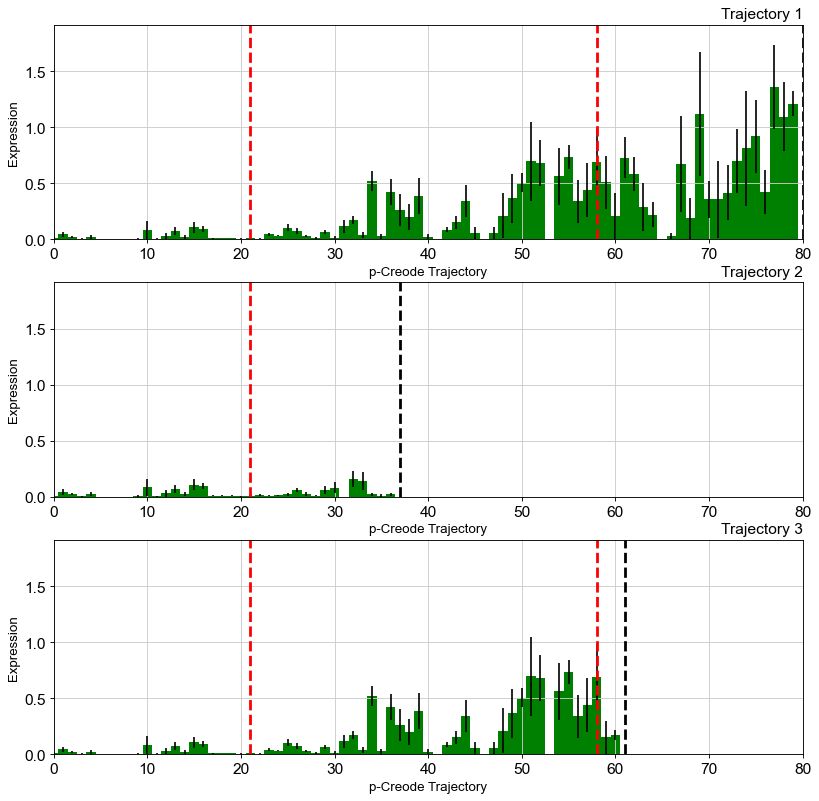

In [42]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('BEST4')), 0)
plt.savefig('Output_UC2samples/BEST4_graph.png')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


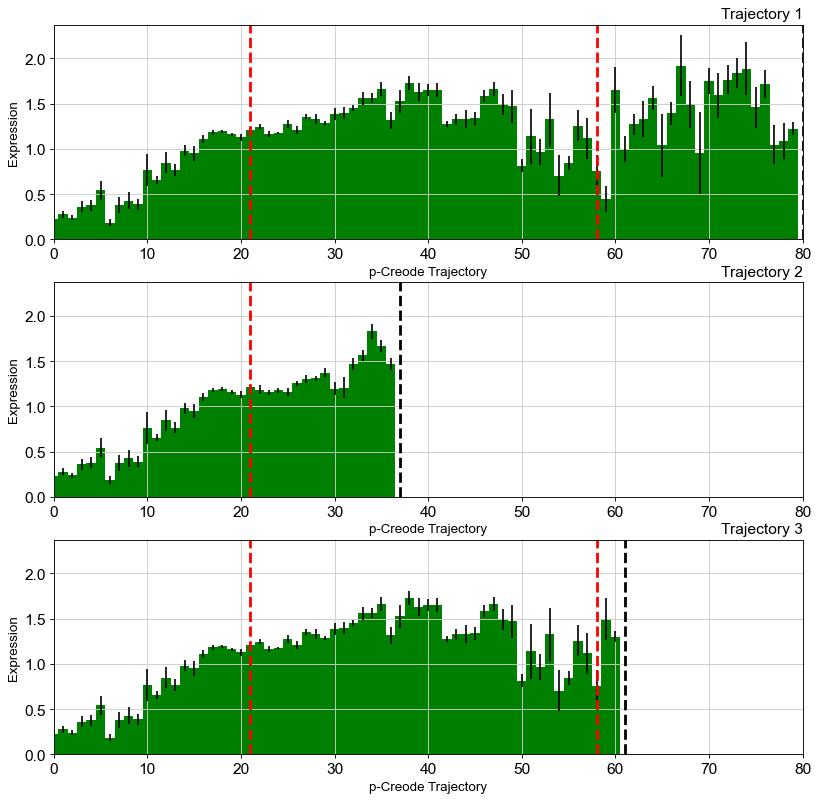

In [43]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('SELENBP1')), 0)
plt.savefig('Output_UC2samples/SELENBP1_graph.png')

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


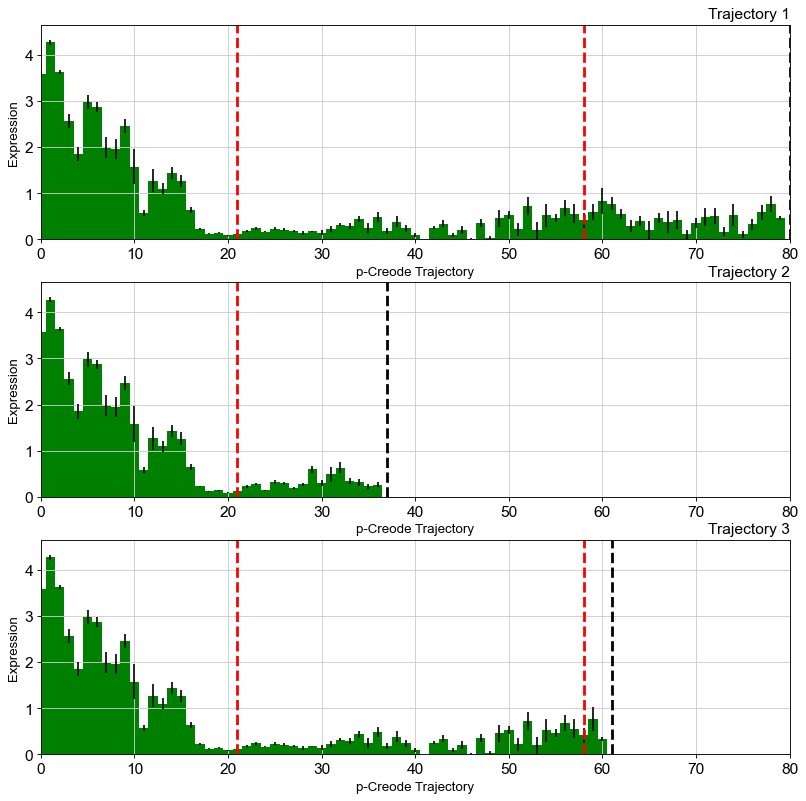

In [45]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('MUC2')), 0)
plt.savefig('Output_UC2samples/MUC2_graph.png')

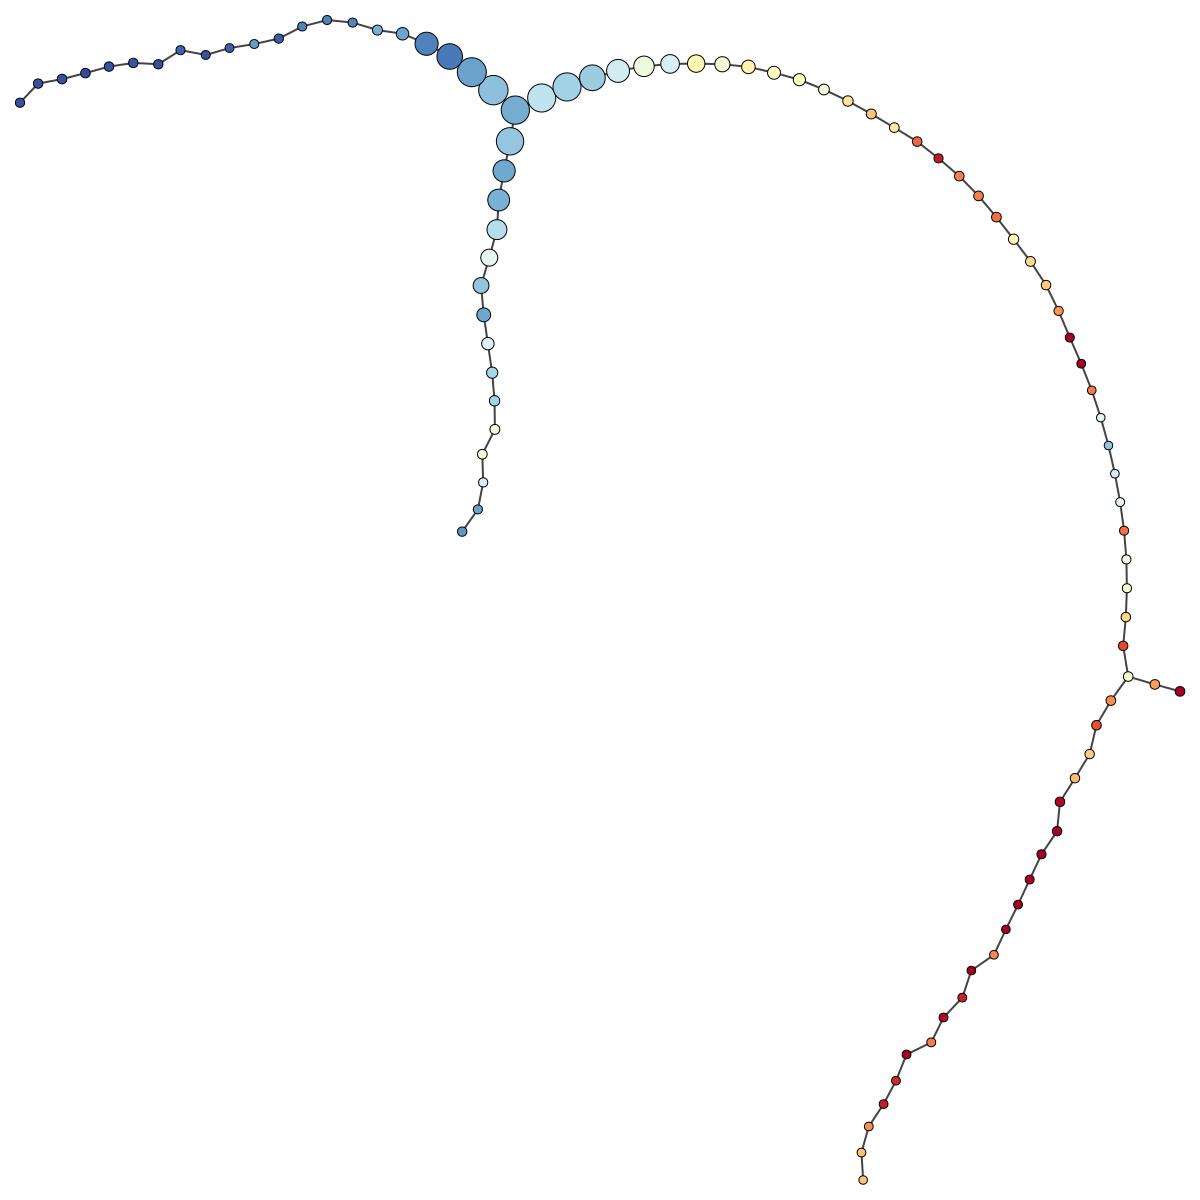

In [95]:
analysis.plot_save_graph( seed=seed, overlay=pd.Series(adata.obs_vector('SLC26A2')), file_out='SLC26A2', upper_range=2)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


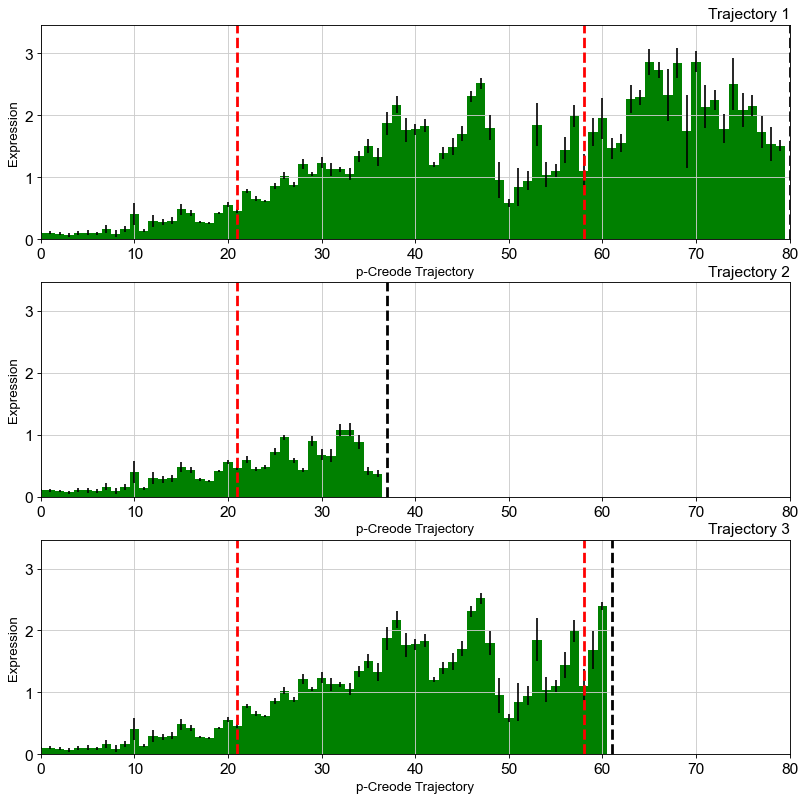

In [94]:
analysis.plot_analyte_dynamics( pd.Series(adata.obs_vector('SLC26A2')), 0)
plt.savefig('Output_UC2samples/SLC26A2_graph.png')

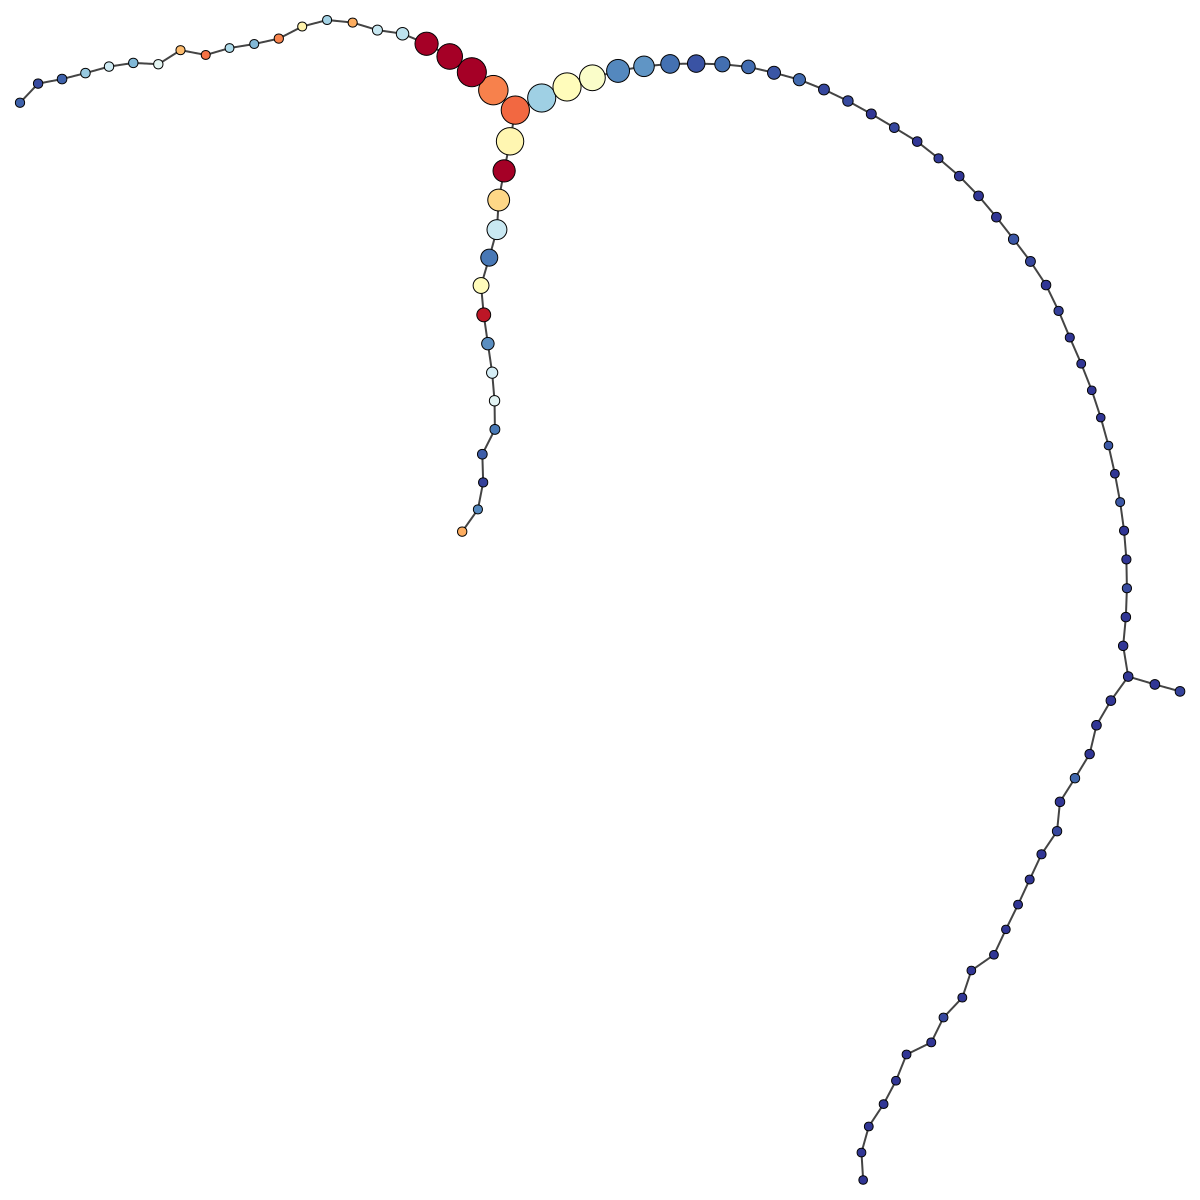

In [92]:
analysis.plot_save_graph( seed=seed, overlay=pd.Series(adata.obs_vector('ASCL2')), file_out='ASCL2', upper_range=5)

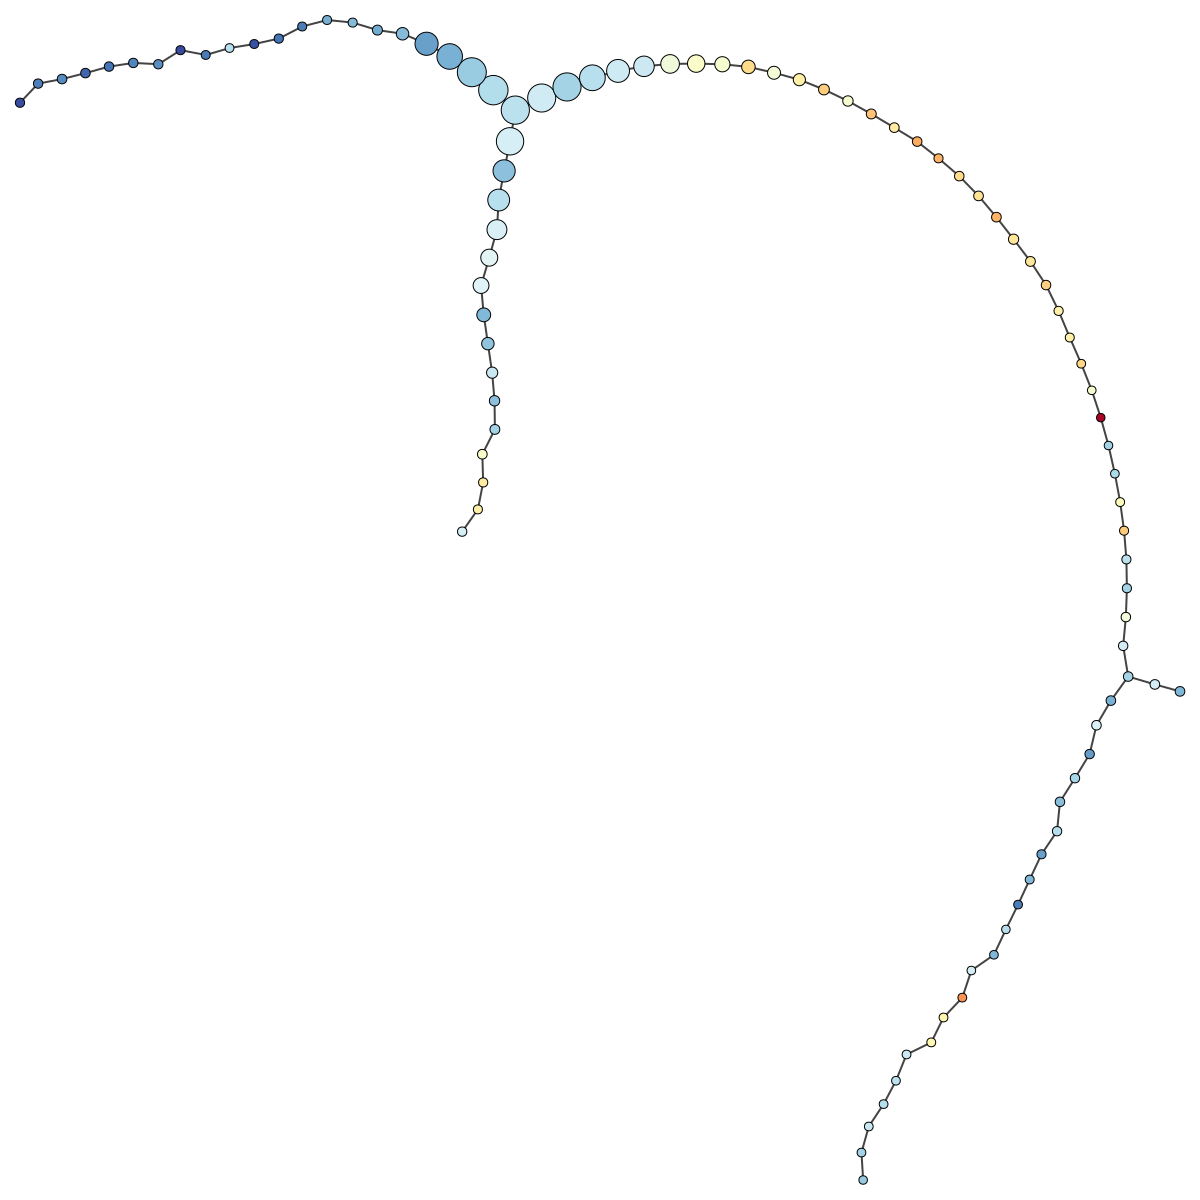

In [98]:
analysis.plot_save_graph( seed=seed, overlay=pd.Series(adata.obs_vector('LCN2')), file_out='LCN2', upper_range=3)